### **Overall Introduction**

We consider the following multi-armed bandit problem. 
 - Time horizon is $T$. 
 - The number of bandits is $I $. 
 - The arm (state) space of bandit $i$ is $\mathcal{S}_i=\mathcal{S}$. 
 - At time t, for each bandit $i$ with arm (state) $s_i$, there are two actions, 0 (do nothing action) and 1 (pull the arm). 
 - The initial probability is $q_i(s_i)$. The ground truth transition kernel is $p_{ti}\left(\cdot|s_i,a_i=0\right)$ and $p_{ti}\left(\cdot|s_i,a_i=1\right)$. 
 - At time $t$, for bandit $i$ with arm $s_i$ and action $a_i$, the reward is $r_{ti}(s_i,a_i)$. 
 - At time $t$, for bandit $i$ with arm $s_i$ and action $a_i$, the ambiguity set is
    $$\mathcal{P}_{ts_i,a_i}=\left\{\bm{p}_{ts_i,a_i}\in \mathscr{P}(\mathcal{S}_i)\mid ||\bm{p}_{ts_i,a_i}-\hat{\bm{p}}_{ts_i,a_i}||\leq o_{ts_i,a_i}\right\},$$ 
    where $\hat{\bm{p}}_{ts_i,a_i}$ is the empirical transition kernel derived from MLE, and $||\cdot||$ is some norm. In the following, we will use the $L_{\infty}$ norm, as it allows us to directly analyze the constant decision rule. Additionally, this choice enables us to efficiently solve the small LPs during backward induction. 
 - The resource constraint is the total number of actions that pull the arm is less than $b\cdot I$. Formally, $D_{ti}(s_i,a_i)=\mathbb{I}\left\{a_i=1\right\}$, $\sum_{i\in[I]}D_{ti}(s_i,a_i)\leq b\cdot I$.


Our goal is to maximize the expected total reward under the resource constraints, i.e., the classical weakly coupled MDP problem
\begin{align*} 
    &\max_{{\bm{\pi}}\in \boldsymbol{\Pi}}\boldsymbol{\mathbb{E}}^{\bm{\pi}}\left[\sum_{t\in[T]}{r}_t(\boldsymbol{S}_t,\boldsymbol{A}_t){\Huge\mid} {\boldsymbol{S}_0\sim \bm{q}} \right] = \mathop{\sum}\limits_{\bm{s}\in \bm{\mathcal{S}}}q(\bm{s})J_{0}(\bm{s}),
\end{align*}
where 
\begin{gather*}
    J_{t}(\boldsymbol{s})=\max_{\boldsymbol{a}\in\boldsymbol{\mathcal{A}^C(\boldsymbol{s})}}\left\{ r_t(\boldsymbol{s},\boldsymbol{a})+\sum_{\boldsymbol{s}'\in\boldsymbol{\mathcal{S}}}p_t(\boldsymbol{s}'{\Large\mid} \boldsymbol{s},\boldsymbol{a})J_{t+1}(\boldsymbol{s}')\right\},\quad t\in[T],\\
    J_{T+1}(\boldsymbol{s})=0\nonumber.
\end{gather*}
Consider a given random policy ${\bm{\pi}}$, the expected total reward under ${\bm{\pi}}$ then can be estimated through simulation. ${\bm{\pi}}$ can yield the following infeasible policy and feasible policy.

1. Infeasible policy. Firstly, for each bandit $i$, sample the initial state $\boldsymbol{S}_{0i}$ from the distribution $q_i(\cdot)$. Then, at each time $t$, given the state $\boldsymbol{S}_{ti}$, determine the action $\boldsymbol{A}_{ti}$ (either pulling the arm or doing nothing) according to the policy ${\pi}_{ti}(\cdot \mid \boldsymbol{S}_{ti})$. After taking the action, collect the reward $r_{ti}(\boldsymbol{S}_{ti}, \boldsymbol{A}_{ti})$ and transition to the next state $\boldsymbol{S}_{t+1,i}$ based on the ground truth transition kernel $
p_{ti} \left( \cdot \mid \boldsymbol{S}_{ti}, \boldsymbol{A}_{ti} \right).
$ Finally, at time $T+1$, the total accumulated reward is given by  $
\sum_{i\in[I]}\sum_{t\in[T]}r_{ti}(\boldsymbol{S}_{ti}, \boldsymbol{A}_{ti}).
$
2. Feasible policy. Same procedure as the infeasible policy but make sure the resources constraint $\sum_{i\in[I]}D_{ti}(\boldsymbol{S}_{ti}, \boldsymbol{A}_{ti}) = \sum_{i\in[I]}\mathbb{1}\left\{\bm{A}_{ti} = 1\right\}\leq b \cdot I$ is satisfied at each time $t$.

If the ground truth transition kernel is known, as the number of constituent MDPs and the time horizon increase, the problem admits an asymptotically optimal objective by solving the fluid LP, from which an asymptotically optimal random policy can be constructed by ${\pi}^{ASY}_{ti}(a_i = 1\mid s_i) =  \frac{{\pi}_{ti}(s_i, a_i = 1)}{{\pi}_{ti}(s_i, a_i = 1) + {\pi}_{ti}(s_i, a_i = 0)}$, and the infeasible policy and feasible policy of $\bm{\pi}^{ASY}$ will perform similarly.

However, in practice, the ground truth transition kernel is unknown. Instead, we can only observe a set of $K$ historical trajectories with length $m$. Now our task is to construct some reasonable random policy based on the information of historical trajectories. One natural idea is to first obtain the maximum likelihood estimate (MLE) of the transition kernel and initial probability. Then, one can construct the random policy by directly solving the fluid LP problem, replacing the ground truth transition with its MLE. We denote the infeasible policy and feasible policy obtained in this manner as IP-FLP and FP-FLP, respectively.

Intuitively, if $K \cdot m$ is small, then the MLE is inaccurate, leading to suboptimal performance of IP-FLP and FP-FLP. Hence, we aim to demonstrate that our two robust policies—the first-order method of robust Lagrangian relaxation and CDR achieve better performance. Our baseline will be the IP-FLP/FP-FLP, their random variants (randomly pulling the arm to $b\cdot I$ if IP-FLP/FP-FLP pulls less arms), and pure random policy.



### **Implementation Details**

 **Parameters**
- Time horizon: \( T = 15 \)
- Number of iterations: \( I = 100 \)
- Number of states: $ |\mathcal{S}|$= 6 
- Budget constraint: \( b = 25\% \)
- The initial probability distribution is randomly generated and assumed to be known.

**Policy Ratio**

The **policy ratio** of a policy is defined as the total reward of that policy divided by the total reward of the asymptotically optimal policy $ \bm{\pi}^{ASY} $.

---

### **Implementation Overview**

The implementation is divided into **7 parts**.

**Part 1: Preparation**
- Include necessary imports and basic functions.
- Implement functions for:
  - Generating the transition kernel.
  - Sorting a list according to given weights (useful for implementing infeasible/feasible policies).

**Part 2: Sampling and MLE Estimation**
- Sample the ground truth transition kernel and reward structures.
- Implement functions for:
  - Generating sample paths.
  - Computing the Maximum Likelihood Estimate (MLE) of the transition kernel and determining the radius of the ambiguity set.

**Part 3: Fluid LP and CDR**
- Implement the **Fluid LP**, **CDR** and their associated policies.
- Key functions:
  - `fluid_LP` and `constant_decision_rule_LP`: Solve the fluid LP and CDR by using Cplex.
  - `monte_carlo_randomized_policy_infeasible/feasible`: Construct infeasible and feasible policies.

**Part 4: Subgradient Method**
- Implement the **subgradient method** and its associated policies.
- Key functions:
  - `get_primal_solution` and `solve_dual_problem`: Solves the Interval Matrix Model using bisection search for efficient LP solving during backward induction.  
  - `RLagrangian_relaxation_parallel`: Implements backward induction.
  - `subgradient`: Implements the subgradient method.
  - `Rlagrangian_policy_infeasible` / `Rlagrangian_policy_feasible`: Construct infeasible and feasible policies.

**Part 5: Pure Random Policy** - Implement a **pure random policy**.

**Part 6: Policy Evaluation**
- Use the `policy_ratio_Lag` function to aggregate and compare all policies.
- Use the `main` function to analyze the trend of the policy ratio of two robust policies with respect to changes in the radius of the ambiguity set.

**Part 7: Radius Selection**
- Determine the optimal method for selecting the best radius for the ambiguity set.

#### **Part 1: Basic functions for preparation**

In [1]:
"""
This module provides various utilities and imports necessary for data processing, mathematical computations, 
parallel processing, and optimization using CPLEX. It includes the following functionalities:
- Importing future annotations for forward compatibility.
- Concurrent futures for asynchronous execution.
- Garbage collection management.
- Mathematical functions and constants.
- Multiprocessing for parallel execution.
- OS module for interacting with the operating system.
- Pickle for object serialization.
- Random for generating random numbers.
- Time for time-related functions.
- Collections for specialized container datatypes.
- Functools for higher-order functions.
- Pathlib for filesystem paths.
- Typing for type hints.
External libraries:
- Click for creating command-line interfaces.
- CPLEX for optimization problems.
- Matplotlib for plotting graphs.
- NumPy for numerical operations.
- Pandas for data manipulation and analysis.
- tqdm for progress bars.
"""
from __future__ import annotations
import concurrent.futures
import gc
import math
import multiprocessing as mp
import os
import pickle
import random
import time
from collections import defaultdict
from functools import partial
from pathlib import Path
from typing import Dict, List, Optional, Tuple

import click
import cplex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cplex import Cplex, SparsePair
from cplex.exceptions import CplexError
from tqdm.auto import tqdm
from typing import List, Optional

In [2]:
def generate_dist(dimension: int, lower_bound: float) -> np.ndarray:
    """
    Generate a normalized probability distribution for a given dimension.

    Args:
    dimension (int): The dimension of the distribution.
    lower_bound (float): The lower bound to be added to each element before normalization.

    Returns:
    np.ndarray: An array representing the normalized probability distribution.
    """
    # dist = np.random.rand(dimension) + lower_bound
    # dist /= np.sum(dist)
    # dist = np.ones(dimension)/ dimension
    dist = np.zeros(dimension)
    dist[3] = 1
    return dist

# # Example usage
# dimension = 5
# lower_bound = 0.1
# distribution = generate_dist(dimension, lower_bound)
# print(f"Generated distribution: {distribution}")

In [3]:
def generate_number_in_dist_batch(dists: np.ndarray) -> np.ndarray:
    """
    Generate a batch of numbers based on multiple probability distributions (one per bandit) using a vectorized approach.

    Args:
        dists (np.ndarray): A 2D array where each row is a probability distribution for a bandit (shape: [number_of_bandits, number_of_states]).

    Returns:
        np.ndarray: An array of indices representing the new states for each bandit.
    """
    cumulative_dists = np.cumsum(dists, axis=1)
    random_values = np.random.rand(dists.shape[0], 1)
    new_states = (cumulative_dists < random_values).sum(axis=1)
    return new_states

# # Example usage
# number_of_bandits = 3
# number_of_states = 5
# lower_bound = 0.2
# dists = np.array([generate_dist(number_of_states, lower_bound) for _ in range(number_of_bandits)])
# new_states = generate_number_in_dist_batch(dists)
# print(f"Generated new states: {new_states}")

In [4]:
# def generate_random_transition_kernel(dimension) -> np.ndarray:
#     """
#     Generate a transition kernel based on the following rules:
#     - For states 0 <= i <= 4:
#         P(i | i, a=0) = 0.3
#         P(i+1 | i, a=0) = 0.7
#     - For state 5:
#         P(5 | 5, a=0) = 1.0

#     Returns:
#         np.ndarray: Transition kernel of shape (6, 6, 2)
#     """
#     P = np.zeros((dimension, dimension, 2))
    
#     for i in range(5):
#         P[i, i, 0] = 0.3
#         P[i, i + 1, 0] = 0.7

#     P[5, 5, 0] = 1.0
    
#     for i in range(6):
#         P[i, 0, 1] = 1
#     return P

# # # Example usage
# # dimension  = 6
# # transition_kernel_0 = generate_random_transition_kernel(dimension)[:,:, 0]
# # transition_kernel_1 = generate_random_transition_kernel(dimension)[:,:, 1]
# # print("Generated do-nothing transition kernel:\n", transition_kernel_0)
# # print("Generated pulled transition kernel:\n", transition_kernel_1)

In [5]:
def generate_random_transition_kernel(dimension) -> np.ndarray:
    """
    Generate a transition kernel based on the following rules:
    donothing_action (a=0):
    - For states 0 <= i <= 6:
        P(i | i, a=0) = 0.2
        P(i+1 | i, a=0) = 0.8
    - For state 7:
        P(7 | 7, a=0) = 1.0
    - For state 8:
        P(8 | 8, a=0) = 0.2
        P(0 | 8, a=0) = 0.8
    - For state 9:
        P(9 | 9, a=0) = 1.0

    pull_action (a=1):    
    - For states 0 <= i <= 7:
        P(i+1 | i, a=1) = 0.3
        P(8 | i, a=1) = 0.6
        P(9 | i, a=1) = 0.1
    - For state 8:
        P(8 | 8, a=1) = 1
    - For state 9:
        P(8 | 9, a=1) = 0.6 
        P(9 | 9, a=1) = 0.4   
    Returns:
        np.ndarray: Transition kernel of shape (10, 10, 2)
    """
    P = np.zeros((dimension, dimension, 2))
    # donothing action (a=0)
    for i in range(7):
        P[i, i, 0] = 0.2
        P[i, i + 1, 0] = 0.8
    P[7, 7, 0] = 1.0
    P[8, 8, 0] = 0.2
    P[8, 0, 0] = 0.8
    P[9, 9, 0] = 1.0

    # pull action (a=1)
    # p_jackpot = np.random.uniform(0, 0.1)
    p_jackpot = 0
    for i in range(6):
        P[i, i + 1, 1] = 0.3 - p_jackpot
        P[i, 7, 1] = p_jackpot
        P[i, 8, 1] = 0.6
        P[i, 9, 1] = 0.1
    P[6, 7, 1] = 0.3
    P[6, 8, 1] = 0.6
    P[6, 9, 1] = 0.1
    P[7, 7, 1] = 0.3
    P[7, 8, 1] = 0.6
    P[7, 9, 1] = 0.1
    P[8, 8, 1] = 1.0
    P[9, 8, 1] = 0.6
    P[9, 9, 1] = 0.4

    return P

# # Example usage
# dimension  = 10
# transition_kernel_0 = generate_random_transition_kernel(dimension)[:,:, 0]
# transition_kernel_1 = generate_random_transition_kernel(dimension)[:,:, 1]
# print("Generated do-nothing transition kernel:\n", transition_kernel_0)
# print("Generated pulled transition kernel:\n", transition_kernel_1)

In [6]:
# def generate_random_transition_kernel(dimension: int) -> np.ndarray:
#     """
#     Generate a random transition kernel similar to the structure you described.
#     Probabilities that were originally hard-coded (e.g., 0.2, 0.8, etc.) 
#     are now randomly sampled but normalized to sum to 1 for each state-action pair.
    
#     Returns:
#         np.ndarray: Transition kernel of shape (dimension, dimension, 2)
#     """
#     P = np.zeros((dimension, dimension, 2))
    
#     # -------------------------
#     # donothing action (a=0)
#     # -------------------------
#     for i in range(7):
#         # Generate two random positive numbers and normalize to sum to 1
#         probs = np.random.dirichlet([1, 1])
#         P[i, i, 0] = probs[0]
#         P[i, i + 1, 0] = probs[1]
    
#     P[7, 7, 0] = 1.0  # absorbing
    
#     probs = np.random.dirichlet([1, 1])
#     P[8, 8, 0] = probs[0]
#     P[8, 0, 0] = probs[1]
    
#     P[9, 9, 0] = 1.0  # absorbing
    
#     # -------------------------
#     # pull action (a=1)
#     # -------------------------
#     for i in range(6):
#         # For each state, choose 3 destinations: (i+1), 8, 9
#         probs = np.random.dirichlet([1, 1, 1])
#         P[i, i + 1, 1] = probs[0]
#         P[i, 8, 1] = probs[1]
#         P[i, 9, 1] = probs[2]
    
#     # Special handling for i = 6, 7 (they have same structure)
#     for i in [6, 7]:
#         probs = np.random.dirichlet([1, 1, 1])
#         P[i, 7, 1] = probs[0]
#         P[i, 8, 1] = probs[1]
#         P[i, 9, 1] = probs[2]
    
#     P[8, 8, 1] = 1.0  # absorbing
    
#     probs = np.random.dirichlet([1, 1])
#     P[9, 8, 1] = probs[0]
#     P[9, 9, 1] = probs[1]
    
#     return P

# # # Example usage
# # dimension  = 10
# # transition_kernel_0 = generate_random_transition_kernel(dimension)[:,:, 0]
# # transition_kernel_1 = generate_random_transition_kernel(dimension)[:,:, 1]
# # print("Generated do-nothing transition kernel:\n", transition_kernel_0)
# # print("Generated pulled transition kernel:\n", transition_kernel_1)


In [7]:
# kernel used for nonconvex examle
# def generate_random_transition_kernel(dimension) -> np.ndarray:
#     """
#     Generate the transition kernel 

#     Returns:
#         np.ndarray: Transition kernel of shape (7, 7, 2)
#     """
#     P = np.zeros((dimension, dimension, 2)) 
    
#     P[0, 1, 1] = 0.5
#     P[0, 2, 1] = 0.5
    
#     P[1, 3, 1] = 0.6
#     P[1, 4, 1] = 0.4
    
#     P[2, 5, 1] = 0.6
#     P[2, 6, 1] = 0.4
    
#     P[4, 4, 1] = 1
#     P[5, 5, 1] = 1
#     P[6, 6, 1] = 1
    
#     P[:, :, 0] = np.eye(7)  # Identity for do-nothing action
    
          
#     return P

# # # Example usage
# # dimension  = 7
# # transition_kernel_0 = generate_random_transition_kernel(dimension)[:,:, 0]
# # transition_kernel_1 = generate_random_transition_kernel(dimension)[:,:, 1]
# # print("Generated do-nothing transition kernel:\n", transition_kernel_0)
# # print("Generated pulled transition kernel:\n", transition_kernel_1)

In [8]:
# # kernel used for zero donothing reward
# def generate_random_transition_kernel(dimension) -> np.ndarray:
#     """
#     Generate the transition kernel 

#     Returns:
#         np.ndarray: Transition kernel of shape (6, 6, 2)
#     """
#     P = np.zeros((dimension, dimension, 2)) 
    
#     P[0, 0, 1] = 1
    
#     P[1, 0, 1] = 1
    
#     P[2, 0, 1] = 0.6
#     P[2, 1, 1] = 0.3
#     P[2, 2, 1] = 0.1

#     P[3, 0, 1] = 0.5
#     P[3, 1, 1] = 0.25
#     P[3, 2, 1] = 0.2
#     P[3, 3, 1] = 0.05

#     P[4, 0, 1] = 0.4
#     P[4, 1, 1] = 0.3
#     P[4, 2, 1] = 0.15
#     P[4, 3, 1] = 0.1
#     P[4, 4, 1] = 0.05
                        
#     P[5, 0, 1] = 0.4
#     P[5, 1, 1] = 0.2
#     P[5, 2, 1] = 0.15
#     P[5, 3, 1] = 0.1
#     P[5, 4, 1] = 0.1
#     P[5, 5, 1] = 0.05
    
#     for i in range(3):
#         P[i, i, 0] = 0.95
#         P[i, i + 1, 0] = 0.05
        
#     P[3, 3, 0] = 0.7
#     P[3, 4, 0] = 0.2
#     P[3, 5, 0] = 0.1
    
#     P[4, 4, 0] = 0.6 
#     P[4, 5, 0] = 0.4
    
#     P[5, 5, 0] = 1.0
    
          
#     return P

# # # Example usage
# # dimension  = 6
# # transition_kernel_0 = generate_random_transition_kernel(dimension)[:,:, 0]
# # transition_kernel_1 = generate_random_transition_kernel(dimension)[:,:, 1]
# # print("Generated do-nothing transition kernel:\n", transition_kernel_0)
# # print("Generated pulled transition kernel:\n", transition_kernel_1)

In [9]:
# def generate_reward_matrix(number_of_bandit_in_total: int) -> np.ndarray:
#     """
#     Generate a reward matrix of shape (number_of_bandit_in_total, 6, 2), where:
#     - R[:, s, 0] corresponds to reward for state s and donothing action
#     - R[:, s, 1] corresponds to reward for state s and pulled action

#     Reward definitions:
#     - For donothing action:
#         r(s=0...3, a=0) = 0
#         r(s=4,5, a=0) = -9
#     - For pulled action:
#         r(s=i, a=1) = -1 - i for i in 0...5

#     Returns:
#         np.ndarray: Reward matrix of shape (number_of_bandit_in_total, 6, 2)
#     """
#     R = np.zeros((number_of_bandit_in_total, 6, 2))
#     # Donothing action rewards
#     R[:, 0:4, 0] = 0
#     R[:, 4:6, 0] = -9
#     # Pulled action rewards
#     for i in range(6):
#         R[:, i, 1] = -1 - i
#     # Normalize R to [0, 1]
#     R_min = R.min()
#     R_max = R.max()
#     if R_max > R_min:
#         # R = (R - R_min) / (R_max - R_min)
#         R = (R - R_min) / (R - R_min).sum(axis=1, keepdims=True)
#         return R

# # # Example usage
# # number_of_bandit_in_total = 10
# # reward_matrix = generate_reward_matrix(number_of_bandit_in_total)
# # print("Reward matrix of donothing action:\n", reward_matrix[:, :, 0])
# # print("Reward matrix of pulled action:\n", reward_matrix[:, :, 1])


In [45]:
def generate_reward_matrix(number_of_bandit_in_total: int, seeds: Optional[List[int]] = None) -> np.ndarray:
    """
    Generate a reward matrix of shape (number_of_bandit_in_total, 10, 2), where:
    - R[:, s, 0] corresponds to reward for state s and donothing action
    - R[:, s, 1] corresponds to reward for state s and pulled action

    Reward definitions:
    - For donothing action:
        r(s=0...6, a=0) = 0.5
        r(s=7, a=0) = 0
        r(s=8, a=0) = 0.35
        r(s=9, a=0) = 0.1
    - For pulled action:
        r(s=0...6, a=1) = 0.5
        r(s=7, a=1) = 0
        r(s=8, a=1) = 0.35
        r(s=9, a=1) = 0.1

    Returns:
        np.ndarray: Reward matrix of shape (number_of_bandit_in_total, 10, 2)
    """
    assert seeds is None or len(seeds) == number_of_bandit_in_total

    rngs = [
        np.random.default_rng(seeds[i]) if seeds else np.random.default_rng()
        for i in range(number_of_bandit_in_total)
    ]
    R = np.zeros((number_of_bandit_in_total, 10, 2))   
    for i in range(number_of_bandit_in_total):
        R[i, :, :] = 0.4 * rngs[i].uniform(0, 1, (10, 2))
    indices = rngs[20].choice(number_of_bandit_in_total, int(0.5 * number_of_bandit_in_total), replace=False)
    # # Donothing action rewards
    # R[:, 0:7, 0] = 0.5
    # R[:, 7, 0] = 0
    # R[:, 8, 0] = 0.35
    # R[:, 9, 0] = 0.1
    # # Pulled action rewards
    # R[:, 0:7, 1] = 0.5
    # R[:, 7, 1] = 0
    # R[:, 8, 1] = 0.35
    # R[:, 9, 1] = 0.1
    # Donothing action rewards
    R[indices, 0:7, 0] = 0.5
    R[indices, 7, 0] = 0
    R[indices, 8, 0] = 0.35
    R[indices, 9, 0] = 0.1
    # Pulled action rewards
    R[indices, 0:7, 1] = 0.5
    R[indices, 7, 1] = 0
    R[indices, 8, 1] = 0.35
    R[indices, 9, 1] = 0.1
    return R

# # Example usage
# number_of_bandit_in_total = 10
# reward_matrix = generate_reward_matrix(number_of_bandit_in_total)
# print("Reward matrix of donothing action:\n", reward_matrix[:, :, 0])
# print("Reward matrix of pulled action:\n", reward_matrix[:, :, 1])

In [11]:
# def generate_reward_matrix(number_of_bandit_in_total: int) -> np.ndarray:
#     """
#     Generate a reward matrix of shape (number_of_bandit_in_total, 10, 2), where:
#     - R[:, s, 0] corresponds to reward for state s and donothing action
#     - R[:, s, 1] corresponds to reward for state s and pulled action

#     Reward definitions:
#     - For donothing action:
#         r(s=0...6, a=0) = random value in [0.5, 0.6)
#         r(s=7, a=0) = random value in [0, 0.1)
#         r(s=8, a=0) = random value in [0.4, 0.45)
#         r(s=9, a=0) = random value in [0.1, 0.2)
#     - For pulled action:
#         r(s=0...6, a=1) = random value in [0.5, 0.6)
#         r(s=7, a=1) = random value in [0, 0.1)
#         r(s=8, a=1) = random value in [0.4, 0.45)
#         r(s=9, a=1) = random value in [0.1, 0.2)

#     Returns:
#         np.ndarray: Reward matrix of shape (number_of_bandit_in_total, 10, 2)
#     """
#     R = np.zeros((number_of_bandit_in_total, 10, 2))
#     # Donothing action rewards
#     R[:, 0:7, 0] = np.random.uniform(0.5, 0.6, size=(number_of_bandit_in_total, 7))
#     R[:, 7, 0] = np.random.uniform(0, 0.1, size=number_of_bandit_in_total)
#     R[:, 8, 0] = np.random.uniform(0.4, 0.45, size=number_of_bandit_in_total)
#     R[:, 9, 0] = np.random.uniform(0.1, 0.2, size=number_of_bandit_in_total)
#     # Pulled action rewards
#     R[:, 0:7, 1] = np.random.uniform(0.5, 0.6, size=(number_of_bandit_in_total, 7))
#     R[:, 7, 1] = np.random.uniform(0, 0.1, size=number_of_bandit_in_total)
#     R[:, 8, 1] = np.random.uniform(0.4, 0.45, size=number_of_bandit_in_total)
#     R[:, 9, 1] = np.random.uniform(0.1, 0.2, size=number_of_bandit_in_total)
#     return R

# # # Example usage
# # number_of_bandit_in_total = 10
# # reward_matrix = generate_reward_matrix(number_of_bandit_in_total)
# # print("Reward matrix of donothing action:\n", reward_matrix[:, :, 0])
# # print("Reward matrix of pulled action:\n", reward_matrix[:, :, 1])

In [12]:
# def generate_reward_matrix(number_of_bandit_in_total: int) -> np.ndarray:
#     """
#     Generate a reward matrix of shape (number_of_bandit_in_total, 5, 2), where:
#     - R[:, s, 0] corresponds to reward for state s and donothing action
#     - R[:, s, 1] corresponds to reward for state s and pulled action

#     Returns:
#         np.ndarray: Reward matrix of shape (number_of_bandit_in_total, 5, 2)
#     """
#     R = np.zeros((number_of_bandit_in_total, 5, 2))

#     # pulled Action rewards
#     R[:, :, 1] =  0.2 * np.random.uniform(0, 1, (number_of_bandit_in_total, 5))
#     # R[np.random.choice(number_of_bandit_in_total, int(0.5 * number_of_bandit_in_total), replace=False), :, 1] = 0
#     # R[np.random.choice(number_of_bandit_in_total, int(1 * number_of_bandit_in_total), replace=False), np.random.choice(1, int(1 * number_of_bandit_in_total)), 1] = 5 * 0.5
#     R[np.random.choice(number_of_bandit_in_total, int(0.5 * number_of_bandit_in_total), replace=False), 2, 1] = 5 * 0.5

#     return R

# # # Example usage
# # number_of_bandit_in_total = 10
# # reward_matrix = generate_reward_matrix(number_of_bandit_in_total)
# # print("Reward matrix of donothing action:\n", reward_matrix[:, :, 0])
# # print("Reward matrix of pulled action:\n", reward_matrix[:, :, 1])

In [13]:
# def generate_reward_matrix(number_of_bandit_in_total: int) -> np.ndarray:
#     """
#     Generate a reward matrix of shape (number_of_bandit_in_total, 6, 2), where:
#     - R[:, s, 0] corresponds to reward for state s and donothing action
#     - R[:, s, 1] corresponds to reward for state s and pulled action

#     Returns:
#         np.ndarray: Reward matrix of shape (number_of_bandit_in_total, 6, 2)
#     """
#     R = np.zeros((number_of_bandit_in_total, 6, 2))
#     R[:, :, 1] =  0.1 * np.random.uniform(0, 1, (number_of_bandit_in_total, 6))
#     # R[np.random.choice(number_of_bandit_in_total, int(0.5 * number_of_bandit_in_total), replace=False), :, 1] = 0
#     # R[np.random.choice(number_of_bandit_in_total, int(1 * number_of_bandit_in_total), replace=False), np.random.choice(1, int(1 * number_of_bandit_in_total)), 1] = 5 * 0.5
#     indices = np.random.choice(number_of_bandit_in_total, int(0.5 * number_of_bandit_in_total), replace=False)
#     R[indices, 3, 1] = 2
#     R[indices, 4, 1] = 0.5
#     R[indices, 5, 1] = 0.25

#     return R

# # # Example usage
# # number_of_bandit_in_total = 10
# # reward_matrix = generate_reward_matrix(number_of_bandit_in_total)
# # print("Reward matrix of donothing action:\n", reward_matrix[:, :, 0])
# # print("Reward matrix of pulled action:\n", reward_matrix[:, :, 1])

In [14]:
# reward used for nonconvex example
# def generate_reward_matrix(number_of_bandit_in_total: int) -> np.ndarray:
#     """
#     Generate a reward matrix of shape (number_of_bandit_in_total, 7, 2), where:
#     - R[:, s, 0] corresponds to reward for state s and donothing action
#     - R[:, s, 1] corresponds to reward for state s and pulled action

#     Returns:
#         np.ndarray: Reward matrix of shape (number_of_bandit_in_total, 7, 2)
#     """
#     R = np.zeros((number_of_bandit_in_total, 7, 2))
#     # Generate random rewards between 0 and 1
#     # For do-nothing action (a=0)
#     R[:, :, 0] = np.random.uniform(0, 1, (number_of_bandit_in_total, 7))
    
#     # For pull action (a=1)
#     R[:, :, 1] = np.random.uniform(0, 1, (number_of_bandit_in_total, 7))

#     return R

# # # Example usage
# # number_of_bandit_in_total = 10
# # reward_matrix = generate_reward_matrix(number_of_bandit_in_total)
# # print("Reward matrix of donothing action:\n", reward_matrix[:, :, 0])
# # print("Reward matrix of pulled action:\n", reward_matrix[:, :, 1])

In [16]:
def sort_truncated(
    weight: np.ndarray, 
    number_of_bandit_in_total: int, 
    maximum_number_of_pulled_bandits: int
) -> Tuple[np.ndarray, int]:
    """
    Sorts the weights and generates a feasible action based on the sorted weights.

    Args:
        weight (np.ndarray): An array of weights.
        number_of_bandit_in_total (int): The total number of bandits.
        maximum_number_of_pulled_bandits (int): The maximum number of bandits that can be pulled.

    Returns:
        Tuple[np.ndarray, int]: A tuple containing the feasible action vector and the sum of pulled bandits.
    """
    indices = np.argsort(weight)[-maximum_number_of_pulled_bandits:][::-1]
    action = np.zeros(number_of_bandit_in_total, dtype=int)
    action[indices] = 1
    action[weight <= 0] = 0

    return action, np.sum(action)

# # Example usage
# weights = np.array([-0.1, 0, -0.35, 0.2, -0.05])
# number_of_bandit_in_total = 5
# maximum_number_of_pulled_bandits = 3
# action, sum_pulled = sort_truncated(weights, number_of_bandit_in_total, maximum_number_of_pulled_bandits)
# print(f"Action: {action}, Sum of pulled bandits: {sum_pulled}")


In [17]:
def random_truncated(
    weight: np.ndarray, 
    number_of_bandit_in_total: int, 
    maximum_number_of_pulled_bandits: int
) -> Tuple[np.ndarray, int]:
    """
    Generate a random truncated feasible action based on the weights.

    Args:
        weight (np.ndarray): An array of weights.
        number_of_bandit_in_total (int): The total number of bandits.
        maximum_number_of_pulled_bandits (int): The maximum number of bandits that can be pulled.

    Returns:
        Tuple[np.ndarray, int]: A tuple containing the feasible action vector and the sum of pulled bandits.
    """
    valid_indices = np.where(weight > 0)[0]
    selected_indices = np.random.choice(valid_indices, size=min(len(valid_indices), maximum_number_of_pulled_bandits), replace=False)
    action = np.zeros(number_of_bandit_in_total, dtype=int)
    action[selected_indices] = 1

    return action, np.sum(action)

# # Example usage
# weights = np.array([0.1, 0, -0.35, 0.2, 0.05])
# number_of_bandit_in_total = 5
# maximum_number_of_pulled_bandits = 3
# action, sum_pulled = random_truncated(weights, number_of_bandit_in_total, maximum_number_of_pulled_bandits)
# print(f"Action: {action}, Sum of pulled bandits: {sum_pulled}")

#### **Part 2: Sample the Ground Truth and Obtain the MLE**

**Ground Truth Transition Kernels**

The ground truth transition probability under the **do-nothing action** is given by the identity distribution. For **pulling arms**, the ground truth transition kernels are defined as follows. For five random states: **i**, **j**, **k**, **m**, and **n**,

- **States i and j**:
  - Have a high probability of transitioning to each other.
  - Are more likely to transition back to themselves than to the other three states.

- **States k, m, and n**:
  - Have a high probability of transitioning to themselves.
  - State k transitions randomly to the other four states.
  - The probability of **m** transitioning to **n** is higher than its probability of transitioning to any of the other three states.
  - Similarly, the probability of **n** transitioning to **m** is higher than its probability of transitioning to any of the other three states.

**Reward Structure**

- **Rewards for pulling arms** $ r_{ti}(s_i, a_i = 1) $:
  - For **50 bandits**, pulling arms gives rewards `[0, 0, 2.5, 0, 0]`, where the position of `2.5` is randomly chosen.
  - For the **other 50 bandits**, the reward for pulling arms is `0`.
- **Reward for not pulling arms**: `0`.

**Historical Trajectories**

Based on the ground truth transition kernels, we observe a set of historical trajectories, denoted as $\left\{ H^{(k)}_{mi} \right\}_{i \in [I], k \in [K]}$, where
$$
H^{(k)}_{mi} = \left(\boldsymbol{S}^{(k)}_{0i}, \boldsymbol{A}^{(k)}_{0i}, \dots, \boldsymbol{S}^{(k)}_{mi}, \boldsymbol{A}^{(k)}_{mi}\right) \in \left(\mathcal{S}_i \times \mathcal{A}_i\right)^{m}.
$$
Here, $i$  represents the index of the bandit, $k$ denotes the trajectory index, $K$ is the total number of trajectories, and $m$ is the length of each trajectory. The initial state follows $\boldsymbol{S}^{(k)}_{0i} \sim q_i(\cdot)$, and actions are sampled according to $\boldsymbol{A}^{(k)}_{t i} \mid \boldsymbol{S}^{(k)}_{t i} \sim \text{Bernoulli}(p)$ for some pulling probability $p$ (default = 0.6). The state transition follows
$\boldsymbol{S}^{(k)}_{t+1} \mid \boldsymbol{S}^{(k)}_{t}, \boldsymbol{A}^{(k)}_{t} \sim p_{ti}\left(\cdot \mid \boldsymbol{S}^{(k)}_{t+1}, \boldsymbol{A}^{(k)}_{t+1}\right).$

**Maximum Likelihood Estimate (MLE)**

The MLE for the transition probability is given by:
$$
\hat{p}_{ti}(s_i' \mid s_i, a_i) = \frac{N^{a_i}_{s_i,s_i'}}{N^{a_i}_{s_i}},
$$
where:
- $ N^{a_i}_{s_i} $: Total number of times $ (s_i, a_i) $ is visited:
  $$
  N^{a_i}_{s_i} = \sum_{k \in [K]} \sum_{j \in [m]} \mathbb{1} \left\{ \boldsymbol{S}^{(k)}_{ji} = s_i, \boldsymbol{A}^{(k)}_{ji} = a_i \right\}.
  $$
- $ N^{a_i}_{s_i,s_i'} $: Number of times the transition $ (s_i, a_i) \to s_i' $ is observed:
  $$
  N^{a_i}_{s_i,s_i'} = \sum_{k \in [K]} \sum_{j \in [m]} \mathbb{1} \left\{ \boldsymbol{S}^{(k)}_{ji} = s_i, \boldsymbol{A}^{(k)}_{ji} = a_i, \boldsymbol{S}^{(k)}_{j+1,i} = s_i' \right\}.
  $$

**Radius of Ambiguity Set**

The radius $ o_{ts_i,a_i} $ is assumed to be proportional to $ \frac{1}{\sqrt{N^{a_i}_{s_i}}} $ for all $ t $.

In [18]:
def initialization(
    number_of_bandit_in_total: int, 
    number_of_states: int, 
    number_of_timeperiods: int,
    seeds: Optional[List[int]] = None
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Initialize the parameters for the bandit problem.

    Args:
        number_of_bandit_in_total (int): The total number of bandits.
        number_of_states (int): The number of states.
        number_of_timeperiods (int): The number of time periods.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: 
        A tuple containing the initial probabilities, transition probabilities for pull action, 
        transition probabilities for do-nothing action, and the reward function.
    """
    assert seeds is None or len(seeds) == number_of_bandit_in_total

    rngs = [
        np.random.default_rng(seeds[i]) if seeds else np.random.default_rng()
        for i in range(number_of_bandit_in_total)
    ]
    # Randomly generate the initial probability using the corresponding rng for each bandit
    init_prob = np.array(
        [generate_dist(number_of_states, 0.2) if seeds is None else rngs[i].choice([generate_dist(number_of_states, 0.2)]) for i in range(number_of_bandit_in_total)]
    )

    # Transition probability for pull action
    prob_pull = np.array(
        [generate_random_transition_kernel(number_of_states)[:,:, 1] if seeds is None else rngs[i].choice([generate_random_transition_kernel(number_of_states)[:,:, 1]]) for i in range(number_of_bandit_in_total)]
    )

    # Transition probability for do-nothing action
    # prob_donothing = np.eye(number_of_states).reshape(1, number_of_states, number_of_states).repeat(number_of_bandit_in_total, axis=0)
    prob_donothing = np.array(
        [generate_random_transition_kernel(number_of_states)[:,:, 0] if seeds is None else rngs[i].choice([generate_random_transition_kernel(number_of_states)[:,:, 0]]) for i in range(number_of_bandit_in_total)])
    
    # Generate the reward function
    reward_donothing = generate_reward_matrix(number_of_bandit_in_total, seeds=seeds)[:, :, 0]
    reward_pull = generate_reward_matrix(number_of_bandit_in_total, seeds=seeds)[:, :, 1]
    # reward = np.random.uniform(-1, 0, (number_of_bandit_in_total, number_of_states))
    # reward[np.random.choice(number_of_bandit_in_total, int(0.5 * number_of_bandit_in_total), replace=False), :] = 0
    # reward[np.random.choice(number_of_bandit_in_total, int(0.5 * number_of_bandit_in_total), replace=False), np.random.choice(number_of_states, int(0.5 * number_of_bandit_in_total))] = number_of_states * 0.5

    return init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull

# # Example usage
# number_of_bandit_in_total = 1
# number_of_states = 10
# number_of_timeperiods = 15
# init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(number_of_bandit_in_total, number_of_states, number_of_timeperiods, seeds=None)
# print(f"Initial probabilities:\n{init_prob}")
# print(f"Transition probabilities for pull action:\n{prob_pull}")
# print(f"Transition probabilities for do-nothing action:\n{prob_donothing}")
# print(f"Reward function of dothing action:\n{reward_donothing}")
# print(f"Reward function of pulled action:\n{reward_pull}")


In [19]:
# def generate_sample_paths(
#     init_prob: np.ndarray,
#     prob_pull: np.ndarray,
#     prob_donothing: np.ndarray,
#     reward_donothing: np.ndarray,
#     reward_pull: np.ndarray,
#     number_of_bandit_in_total: int,
#     number_of_states: int,
#     path_length: int,
#     num_paths: int,
#     pulled_ratio: float,
#     selecting_rule: float = 0.5,
# ) -> np.ndarray:
#     """
#     Generate sample paths for the bandit problem.

#     Args:
#         init_prob (np.ndarray): Initial probabilities for each bandit.
#         prob_pull (np.ndarray): Transition probabilities for the pull action.
#         prob_donothing (np.ndarray): Transition probabilities for the do-nothing action.
#         reward_donothing (np.ndarray): Reward structure of donothing action.
#         reward_pull (np.ndarray): Reward structure of pulled action.
#         number_of_bandit_in_total (int): The total number of bandits.
#         number_of_states (int): The number of states.
#         path_length (int): The length of each path.
#         num_paths (int): The number of sample paths to generate.
#         pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
#         selecting_rule (float): The probability threshold for selecting an arm as active.

#     Returns:
#         np.ndarray: A 3D array of sample paths.
#     """
#     paths = []

#     for _ in range(num_paths):
#         trajectory = []
#         arm_state = np.array(
#             [
#                 np.random.choice(number_of_states, p=init_prob[j])
#                 for j in range(number_of_bandit_in_total)
#             ]
#         )
#         for _ in range(path_length):
#             # Randomly determine which arms are active based on the active probabilities (vectorized)
#             random_values = np.random.rand(number_of_bandit_in_total)

#             active = random_values < selecting_rule
            
#             # Calculate the weights (1 if active, else 0)
#             weights = np.where(active, 1, -1)

#             # Sort and select top arms based on the weights, respecting the pulled_ratio constraint
#             action_pull, num_active = random_truncated(
#                 weights,
#                 number_of_bandit_in_total,
#                 int(pulled_ratio * number_of_bandit_in_total),
#             )
#             action_donothing = 1 - action_pull

#             # Update total reward and arm states based on actions (vectorized)
#             reward_for_pulled = reward_pull[np.arange(number_of_bandit_in_total), arm_state] * action_pull
#             reward_for_donothing = reward_donothing[np.arange(number_of_bandit_in_total), arm_state] * action_donothing
#             reward = reward_for_pulled + reward_for_donothing
#             trajectory.append(np.column_stack((arm_state.copy(), action_pull, reward.copy())))

#             # Update the state of pulled arms and donothing arms based on transition probabilities (vectorized)
#             if np.any(action_pull):
#                 arm_state[action_pull == 1] = generate_number_in_dist_batch(
#                     prob_pull[np.arange(number_of_bandit_in_total)[action_pull == 1], arm_state[action_pull == 1], :]
#                 )
#                 arm_state[action_pull == 0] = generate_number_in_dist_batch(
#                         prob_donothing[np.arange(number_of_bandit_in_total)[action_pull == 0], arm_state[action_pull == 0], :]
#                     )
#         paths.append(trajectory)

#     # paths_new = np.array(
#     #     [np.array(paths)[:, :, i, :] for i in range(number_of_bandit_in_total)]
#     #      )   
#     # return paths_new
    
#     return np.array(paths)
# # # Example usage of generate_sample_paths function

# # number_of_bandit_in_total = 100
# # number_of_states = 6
# # number_of_timeperiods = 15
# # pulled_ratio = 0.25
# # init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(number_of_bandit_in_total, number_of_states, number_of_timeperiods)
# # path_length = 5
# # num_paths = 2
# # selecting_rule = 0.6

# # sample_paths = generate_sample_paths(
# #     init_prob,
# #     prob_pull,
# #     prob_donothing,
# #     reward_donothing,
# #     reward_pull,
# #     number_of_bandit_in_total,
# #     number_of_states,
# #     path_length,
# #     num_paths,
# #     pulled_ratio,
# #     selecting_rule
# # )

# # print(f"Generated sample paths:\n{sample_paths}")
# # print(f"Generated sample paths:\n{sample_paths[:, :, 0:3, :]}")


In [20]:
def generate_sample_paths(
    init_prob: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    number_of_bandit_in_total: int,
    number_of_states: int,
    path_length: int,
    num_paths: int,
    pulled_ratio: float,
    selecting_rule: float = 0.5,
    seeds: Optional[List[int]] = None
) -> np.ndarray:
    """
    Generate sample paths for the bandit problem using per-bandit RNG for reproducibility.

    Args:
        seeds (Optional[List[int]]): A list of random seeds for each bandit.

    Returns:
        np.ndarray: A 4D array of sample paths with shape 
            (number_of_bandit_in_total, num_paths, path_length, 3),
            where the last dimension contains (state, action, reward).
    """
    assert seeds is None or len(seeds) == number_of_bandit_in_total

    rngs = [
        np.random.default_rng(seeds[i]) if seeds else np.random.default_rng()
        for i in range(number_of_bandit_in_total)
    ]

    paths = []

    for i in range(number_of_bandit_in_total):
        bandit_paths = []
        for _ in range(num_paths):
            trajectory = []
            arm_state = rngs[i].choice(number_of_states, p=init_prob[i])
            for t in range(path_length):
                active = rngs[i].random() < selecting_rule
                weight = 1 if active else -1
                weights = np.array([weight])

                action, _ = random_truncated(
                    weights,
                    number_of_bandit_in_total=1,
                    maximum_number_of_pulled_bandits=number_of_bandit_in_total
                )
                action = action[0]

                reward = (
                    reward_pull[i, arm_state] if action == 1
                    else reward_donothing[i, arm_state]
                )

                trajectory.append((arm_state, action, reward))

                # Transition
                if action == 1:
                    dist = prob_pull[i, arm_state]
                else:
                    dist = prob_donothing[i, arm_state]
                arm_state = rngs[i].choice(number_of_states, p=dist)
            bandit_paths.append(trajectory)
        paths.append(bandit_paths)

    return np.array(paths)


In [21]:
def calculate_mle_transition_count(
    sample_path: np.ndarray,
    number_of_bandit_in_total: int,
    number_of_states: int,
    path_length: int,
    number_of_actions: int = 2,
) -> Tuple[Dict[Tuple[int, int, int], int], Dict[Tuple[int, int, int, int], int], np.ndarray]:
    """
    Calculate the Maximum Likelihood Estimation (MLE) transition counts from sample paths.

    Args:
        sample_path (np.ndarray): The sample paths for each bandit.
        number_of_bandit_in_total (int): The total number of bandits.
        number_of_states (int): The number of states.
        path_length (int): The length of each path.
        number_of_actions (int, optional): The number of actions. Defaults to 2.

    Returns:
        Tuple[Dict[Tuple[int, int, int], int], Dict[Tuple[int, int, int, int], int], np.ndarray]:
        - N_sa: Count of state-action pairs.
        - N_sas: Count of state-action-next state triples.
        - initial_prob: Initial state probability distribution.
    """
    # Initialize dictionaries to count transitions and state-action occurrences
    N_sa = defaultdict(int)  # Count N^{a_i}_{s_i}
    N_sas = defaultdict(int)  # Count N^{a_i}_{s_i,s_i'}
    initial_prob = np.zeros((number_of_bandit_in_total, number_of_states))  # Initial state probability distribution

    # Loop over each bandit and its sample paths
    for i in range(number_of_bandit_in_total):
        for path in sample_path[i, :, :, :]:  # Iterate over paths for bandit i
            # Increment initial state count
            initial_state = int(path[0][0])  # First state of the path
            initial_prob[i, initial_state] += 1

            # Loop over the time steps in the path (excluding the last step)
            for t in range(path_length - 1):
                s_t = int(path[t][0])  # Current state
                a_t = int(path[t][1])  # Current action
                s_tp1 = int(path[t + 1][0])  # Next state

                # Increment counts for the current state-action pair and the state-action-next-state triple
                N_sa[(i, s_t, a_t)] += 1
                N_sas[(i, s_t, a_t, s_tp1)] += 1

    # Normalize initial state probabilities
    initial_prob = initial_prob / initial_prob.sum(axis=1, keepdims=True)
    return N_sa, N_sas, initial_prob, len(sample_path[0,:,0,0]) * len(sample_path[0,0,:,0])


# # Example usage of calculate_mle_transition_count function

# number_of_bandit_in_total = 1
# number_of_states = 10
# number_of_timeperiods = 15
# pulled_ratio = 0.25
# init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(number_of_bandit_in_total, number_of_states, number_of_timeperiods)
# path_length = 45
# num_paths = 5
# selecting_rule = 0.6

# sample_paths = generate_sample_paths(
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     reward_donothing,
#     reward_pull,
#     number_of_bandit_in_total,
#     number_of_states,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     selecting_rule
# )

# N_sa, N_sas, initial_prob, _ = calculate_mle_transition_count(
#     sample_paths, number_of_bandit_in_total, number_of_states, path_length
# )
# print(f"N_sa: {N_sa}")
# print(f"N_sas: {N_sas}")
# # print(f"Initial probabilities: {initial_prob}")

In [22]:
def count_to_kernel(
    r: float,
    N_sa: Dict[Tuple[int, int, int], int],
    N_sas: Dict[Tuple[int, int, int, int], int],
    number_of_timeperiods: int,
    number_of_bandit_in_total: int,
    number_of_states: int,
    total_path_length: int,
    number_of_actions: int = 2,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Convert count data to transition kernels and radius matrices.

    Args:
        r (float): Scaling factor for the radius.
        N_sa (Dict[Tuple[int, int, int], int]): Count of state-action pairs.
        N_sas (Dict[Tuple[int, int, int, int], int]): Count of state-action-next state triples.
        number_of_timeperiods (int): The number of time periods.
        number_of_bandit_in_total (int): The total number of bandits.
        number_of_states (int): The number of states.
        total_path_length (int): The total length of the paths.
        number_of_actions (int, optional): The number of actions. Defaults to 2.
    
    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: 
        Transition kernels and radius matrices for pull and do-nothing actions.
    """
    transition_kernel = np.zeros(
        (
            number_of_bandit_in_total,
            number_of_states,
            number_of_actions,
            number_of_states,
        )
    )
    radius = r * np.sqrt(1 / total_path_length) * np.ones(
        (
            number_of_timeperiods,
            number_of_bandit_in_total,
            number_of_actions,
            number_of_states,
            number_of_states,
        )
    )
    # radius = r * np.ones(
    #     (
    #         number_of_timeperiods,
    #         number_of_bandit_in_total,
    #         number_of_actions,
    #         number_of_states,
    #         number_of_states,
    #     )
    # )
    keys = np.array(list(N_sas.keys()))
    counts = np.array(list(N_sas.values()))
    N_sa_values = np.array([N_sa[tuple(key[:3])] for key in keys])
    
    valid_indices = N_sa_values > 0
    transition_kernel[keys[valid_indices, 0], keys[valid_indices, 1], keys[valid_indices, 2], keys[valid_indices, 3]] = counts[valid_indices] / N_sa_values[valid_indices]
    radius[:, keys[valid_indices, 0], keys[valid_indices, 2], keys[valid_indices, 1], keys[valid_indices, 3]] *= np.sqrt(1 / counts[valid_indices]) * np.sqrt(total_path_length)
    # radius[:, keys[valid_indices, 0], keys[valid_indices, 2], keys[valid_indices, 1], keys[valid_indices, 3]] *= np.sqrt(1 / counts[valid_indices])
    mask = np.sum(transition_kernel[:, :, :, :], axis=3) == 0
    transition_kernel = np.where(
        mask[:, :, :, np.newaxis],
        np.array(generate_dist(number_of_states, 0)),
        transition_kernel[:, :, :, :],
    )
    
    return (
        transition_kernel[:, :, 1, :],
        transition_kernel[:, :, 0, :],
        radius[:, :, 1, :, :],
        radius[:, :, 0, :, :],
    )
    
# # Example usage of count_to_kernel function
# r = 0.1
# number_of_bandit_in_total = 100
# number_of_states = 6
# number_of_timeperiods = 15
# pulled_ratio = 0.25
# init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(number_of_bandit_in_total, number_of_states, number_of_timeperiods)
# path_length = 15
# num_paths = 5
# selecting_rule = 0.6

# sample_paths = generate_sample_paths(
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     reward_donothing,
#     reward_pull,
#     number_of_bandit_in_total,
#     number_of_states,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     selecting_rule
# )

# N_sa, N_sas, initial_prob, total_path_length = calculate_mle_transition_count(
#     sample_paths, number_of_bandit_in_total, number_of_states, path_length
# )

# transition_kernel_pull, transition_kernel_donothing, radius_pull, radius_donothing = count_to_kernel(
#     r, N_sa, N_sas, number_of_timeperiods, number_of_bandit_in_total, number_of_states, total_path_length, number_of_actions = 2
# )

# print(f"MLE of transition kernel for pull action:\n{transition_kernel_pull[1]}")
# print(f"Transition kernel for pull action:\n{prob_pull[1]}")
# print(f"MLE of transition kernel for do-nothing action:\n{transition_kernel_donothing[1]}")
# print(f"Transition kernel for pull action:\n{prob_donothing[1]}")
# print(f"Radius for pull action:\n{radius_pull[1]}")
# print(f"Radius for do-nothing action:\n{radius_donothing[1]}")

In [23]:
def get_single_sample(
    sample_idx: int,
    number_of_timeperiods: int,
    number_of_states: int,
    number_of_bandit_in_total: int,
    path_length: int,
    num_paths: int,
    pulled_ratio: float,
    r: float,
    selecting_rule: float = 0.5,
) -> Tuple[Tuple, Tuple]:
    """
    Generate a single sample for the bandit problem.

    Args:
        sample_idx (int): The index of the sample.
        number_of_timeperiods (int): The number of time periods.
        number_of_states (int): The number of states.
        number_of_bandit_in_total (int): The total number of bandits.
        path_length (int): The length of each path.
        num_paths (int): The number of sample paths to generate.
        pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
        r (float): Scaling factor for the radius.
        selecting_rule (float, optional): The probability threshold for selecting an arm as active. Defaults to 0.6.

    Returns:
        Tuple[Tuple, Tuple]: A tuple containing the initial parameters and the calculated transition counts and kernels.
    """
    # random.seed(int(sample_idx))
    # np.random.seed(int(sample_idx))
    # Initialize the parameters
    seeds = [number_of_bandit_in_total * sample_idx + j for j in range(number_of_bandit_in_total)]
    init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(
        number_of_bandit_in_total,
        number_of_states,
        number_of_timeperiods,
        seeds=seeds 
    )
    # Generate sample paths
    sample_paths = generate_sample_paths(
        init_prob,
        prob_pull,
        prob_donothing,
        reward_donothing,
        reward_pull,
        number_of_bandit_in_total,
        number_of_states,
        path_length,
        num_paths,
        pulled_ratio,
        selecting_rule,
        seeds=seeds
    )
    
    # Calculate MLE transition counts
    N_sa, N_sas, initial_prob, total_path_length = calculate_mle_transition_count(
        sample_paths, number_of_bandit_in_total, number_of_states, path_length
    )
    
    # Convert counts to transition kernels and radius matrices
    transition_kernel_pull, transition_kernel_donothing, radius_pull, radius_donothing = count_to_kernel(
        r, N_sa, N_sas, number_of_timeperiods, number_of_bandit_in_total, number_of_states, total_path_length, number_of_actions = 2
    )
    
    
    return (
        (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing),
        (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas),
    )
    
# # Example usage of get_single_sample function
# sample_idx = 45
# r = 0.1
# selecting_rule = 0.5
# number_of_timeperiods = 15
# number_of_states = 10
# number_of_bandit_in_total = 2
# path_length = 45
# num_paths = 5
# pulled_ratio = 1

# (init_prob, prob_pull, prob_donothing, reward_dothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )

# print(f"MLE of transition kernel for pull action:\n{transition_kernel_pull[0]}")
# print(f"Transition kernel for pull action:\n{prob_pull[0]}")
# print(f"MLE of transition kernel for do-nothing action:\n{transition_kernel_donothing[0]}")
# print(f"Transition kernel for do-nothing action:\n{prob_donothing[0]}")
# print(f"Radius for pull action:\n{radius_pull[0]}")
# print(f"Radius for do-nothing action:\n{radius_donothing[0]}")

In [24]:
def get_single_sample_val(
    sample_idx: int,
    number_of_timeperiods: int,
    number_of_states: int,
    number_of_bandit_in_total: int,
    path_length: int,
    num_paths: int,
    pulled_ratio: float,
    r: float,
    l: int,
    selecting_rule: float = 0.6,
) -> Tuple[Tuple, Tuple]:
    """
    Generate a single sample for the bandit problem.

    Args:
        sample_idx (int): The index of the sample.
        number_of_timeperiods (int): The number of time periods.
        number_of_states (int): The number of states.
        number_of_bandit_in_total (int): The total number of bandits.
        path_length (int): The length of each path.
        num_paths (int): The number of sample paths to generate.
        pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
        r (float): Scaling factor for the radius.
        selecting_rule (float, optional): The probability threshold for selecting an arm as active. Defaults to 0.6.
        l (int): The length of the validation path.

    Returns:
        Tuple[Tuple, Tuple]: A tuple containing the initial parameters and the calculated transition counts and kernels.
    """
    random.seed(int(sample_idx))
    np.random.seed(int(sample_idx))
    
    # Initialize the parameters
    init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(
        number_of_bandit_in_total,
        number_of_states,
        number_of_timeperiods,
    )
    
    # Generate sample paths
    sample_paths = generate_sample_paths(
        init_prob,
        prob_pull,
        prob_donothing,
        reward_donothing,
        reward_pull,
        number_of_bandit_in_total,
        number_of_states,
        path_length,
        num_paths,
        pulled_ratio,
        selecting_rule,
    )
    
    # Calculate MLE transition counts using all paths
    N_sa_all, N_sas_all, initial_prob_all, total_path_length_all = calculate_mle_transition_count(
        sample_paths,
        number_of_bandit_in_total,
        number_of_states,
        path_length,
        number_of_actions=2,
    )
    # Calculate MLE transition counts using part of paths
    N_sa_part, N_sas_part, _, total_path_length_part = calculate_mle_transition_count(
        sample_paths[:, :, 0:l, :],
        number_of_bandit_in_total,
        number_of_states,
        l,
        number_of_actions=2,
    )
    
    # Convert counts to transition kernels and radius matrices using all paths
    transition_kernel_pull_all, transition_kernel_donothing_all, radius_pull_all, radius_donothing_all = count_to_kernel(
        r,
        N_sa_all,
        N_sas_all,
        number_of_timeperiods,
        number_of_bandit_in_total,
        number_of_states,
        total_path_length_all,
        number_of_actions=2,
    )
    
    # Convert counts to transition kernels and radius matrices using part of paths
    transition_kernel_pull_part, transition_kernel_donothing_part, radius_pull_part, radius_donothing_part = count_to_kernel(
        r,
        N_sa_part,
        N_sas_part,
        number_of_timeperiods,
        number_of_bandit_in_total,
        number_of_states,
        total_path_length_part,
        number_of_actions=2,
    )
    
    
    return (
        (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull_all, radius_donothing_all, radius_pull_part, radius_donothing_part),
        (initial_prob_all, transition_kernel_pull_all, transition_kernel_donothing_all, transition_kernel_pull_part, transition_kernel_donothing_part, N_sa_all, N_sas_all),
    )
    
# # Example usage of get_single_sample function
# sample_idx = 1
# r = 0.1
# selecting_rule = 0.6
# number_of_timeperiods = 15
# number_of_states = 6
# number_of_bandit_in_total = 100
# path_length = 15
# num_paths = 5
# pulled_ratio = 0.25

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull_all, radius_donothing_all, radius_pull_part, radius_donothing_part), (initial_prob_all, transition_kernel_pull_all, transition_kernel_donothing_all, transition_kernel_pull_part, transition_kernel_donothing_part, N_sa_all, N_sas_all) = get_single_sample_val(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     path_length - 5,
#     selecting_rule,
# )

# print(f"MLE of transition kernel for pull action using all paths:\n{transition_kernel_pull_all[1]}")
# print(f"Transition kernel for pull action:\n{prob_pull[1]}")
# print(f"MLE of transition kernel for pull action using part of paths:\n{transition_kernel_pull_part[1]}")
# print(f"MLE of transition kernel for do-nothing action using all paths:\n{transition_kernel_donothing_all[1]}")
# print(f"Transition kernel for do-nothing action using all paths:\n{prob_donothing[1]}")
# print(f"MLE of transition kernel for do-nothing action using part of paths:\n{transition_kernel_donothing_part[1]}")
# print(f"Radius for pull action using all paths:\n{radius_pull_all[1]}")
# print(f"Radius for do-nothing action using all paths:\n{radius_donothing_all[1]}")

#### **Part 3: Implement fluid LP, and CDR, and test their infeasible/feasible policies**

In [25]:
def fluid_LP(
    T0: int,
    number_of_timeperiods: int,
    number_of_states: int,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    init_prob: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    pulled_ratio: float,
    number_of_bandit_in_total: int,
) -> Tuple[float, np.ndarray, np.ndarray]:
    """
    Solve the fluid_LP using CPLEX.

    Args:
    T0 (int): The initial time period.
    number_of_timeperiods (int): The number of time periods.
    number_of_states (int): The number of states.
    reward_donohting (np.ndarray): A 2D array of rewards of donothing action.
    reward_pull (np.ndarray): A 2D array of rewards of pull action.
    init_prob (np.ndarray): A 2D array of initial probabilities.
    prob_pull (np.ndarray): A 3D array of transition probabilities of pull action.
    prob_donothing (np.ndarray): A 3D array of transition probabilities of donothing action.
    pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
    number_of_bandit_in_total (int): The total number of bandits.

    Returns:
    Tuple[float, np.ndarray, np.ndarray]: The objective value of the solved LP, and the optimal solution pi1_LP, pi0_LP.
    """
    # Initialize CPLEX environment and model
    cplex = Cplex()

    # Disable the stdout of CPLEX
    cplex.set_log_stream(None)
    cplex.set_results_stream(None)
    # Limit the thread usage as we use multiprocessing
    cplex.parameters.threads.set(1)

    cplex.set_problem_type(Cplex.problem_type.LP)
    cplex.objective.set_sense(cplex.objective.sense.maximize)

    # Variable and constraint initialization
    pi1 = [
        [
            [f"pi1_{t}_{j}_{k}" for k in range(number_of_states)]
            for j in range(number_of_bandit_in_total)
        ]
        for t in range(T0, number_of_timeperiods)
    ]

    pi0 = [
        [
            [f"pi0_{t}_{j}_{k}" for k in range(number_of_states)]
            for j in range(number_of_bandit_in_total)
        ]
        for t in range(T0, number_of_timeperiods)
    ]

    # Combine pi1 and pi0 variables and add them to the CPLEX model with lower bounds of 0 
    all_vars = [
        var
        for time_vars in pi1
        for bandit_vars in time_vars
        for var in bandit_vars
    ] + [
        var
        for time_vars in pi0
        for bandit_vars in time_vars
        for var in bandit_vars
    ]
    cplex.variables.add(names=all_vars, lb=[0] * len(all_vars))

    # Objective function (maximize reward)
    Robjective_pi1 = [
        (f"pi1_{t}_{j}_{k}", reward_pull[j][k])
        for k in range(number_of_states)
        for j in range(number_of_bandit_in_total)
        for t in range(T0, number_of_timeperiods)
    ]

    Robjective_pi0 = [
        (f"pi0_{t}_{j}_{k}", reward_donothing[j][k])
        for k in range(number_of_states)
        for j in range(number_of_bandit_in_total)
        for t in range(T0, number_of_timeperiods)
    ]

    Robjective = Robjective_pi1 + Robjective_pi0
    cplex.objective.set_linear(Robjective)

    # Initial constraints
    initial_constraints = [
        SparsePair(
            ind=[
                f"pi1_{T0}_{j}_{k}",
                f"pi0_{T0}_{j}_{k}",
            ],
            val=[1, 1],
        )
        for j in range(number_of_bandit_in_total)
        for k in range(number_of_states)
    ]
    cplex.linear_constraints.add(
        lin_expr=initial_constraints,
        senses=["E"] * len(initial_constraints),
        rhs=init_prob.flatten().tolist(),
    )

    # Time period constraints
    time_constraints = []
    time_senses = []
    time_rhs = []

    for t in range(T0, number_of_timeperiods):
        curr_LHS = [
            f"pi1_{t}_{j}_{k}"
            for j in range(number_of_bandit_in_total)
            for k in range(number_of_states)
        ]
        time_constraints.append(
            SparsePair(ind=curr_LHS, val=[1] * len(curr_LHS))
        )
        time_senses.append("L")
        time_rhs.append(pulled_ratio * number_of_bandit_in_total)

        if t < number_of_timeperiods - 1:
            for j in range(number_of_bandit_in_total):
                for k in range(number_of_states):
                    curr_RHS = (
                        [
                            f"pi1_{t + 1}_{j}_{k}",
                            f"pi0_{t + 1}_{j}_{k}",
                        ]
                        + [
                            f"pi1_{t}_{j}_{l}"
                            for l in range(number_of_states)
                        ]
                        + [
                            f"pi0_{t}_{j}_{l}"
                            for l in range(number_of_states)
                        ]
                    )
                    curr_RHS_coeff = (
                        [-1, -1]
                        + [prob_pull[j][l][k] for l in range(number_of_states)]
                        + [
                            prob_donothing[j][l][k]
                            for l in range(number_of_states)
                        ]
                    )
                    time_constraints.append(
                        SparsePair(ind=curr_RHS, val=curr_RHS_coeff)
                    )
                    time_senses.append("E")
                    time_rhs.append(0)

    cplex.linear_constraints.add(
        lin_expr=time_constraints, senses=time_senses, rhs=time_rhs
    )

    # Solve the problem
    cplex.parameters.timelimit.set(60)  # Set a time limit if needed
    try:
        cplex.solve()
    except CplexError as exc:
        print(exc)
        return None

    # Retrieve the objective value
    objval = cplex.solution.get_objective_value()

    pi = (
        np.array(cplex.solution.get_values())
        .view()
        .reshape(
            2,
            number_of_timeperiods - T0,
            number_of_bandit_in_total,
            number_of_states,
        )
    )
    pi1_LP = pi[0, :, :, :]
    pi0_LP = pi[1, :, :, :]

    return objval, pi1_LP, pi0_LP

# # Example usage of fluid_LP function
# T0 = 0
# number_of_bandit_in_total = 100
# number_of_states = 5
# number_of_timeperiods = 15
# pulled_ratio = 0.25
# init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(number_of_bandit_in_total, number_of_states, number_of_timeperiods)
# objval, pi1_LP, pi0_LP = fluid_LP(
#     T0,
#     number_of_timeperiods,
#     number_of_states,
#     reward_donothing,
#     reward_pull,
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     pulled_ratio,
#     number_of_bandit_in_total
# )

# print(f"Objective value: {objval}")
# print(f"Optimal solution pi1_LP:\n{pi1_LP}")
# print(f"Optimal solution pi0_LP:\n{pi0_LP}")

In [26]:
def constant_decision_rule_LP(
    T0: int,
    number_of_timeperiods: int,
    number_of_states: int,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    init_prob: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    pulled_ratio: float,
    number_of_bandit_in_total: int,
    radius_pull: np.ndarray,
    radius_donothing: np.ndarray,
    change: float,
) -> Tuple[float, np.ndarray, np.ndarray]:
    """
    Solve the constant_decision_rule_LP using CPLEX.

    Args:
    T0 (int): Initial time period.
    number_of_timeperiods (int): The number of time periods.
    number_of_states (int): The number of states.
    reward_donohting (np.ndarray): A 2D array of rewards of donothing action.
    reward_pull (np.ndarray): A 2D array of rewards of pull action.
    init_prob (np.ndarray): A 2D array of initial probabilities.
    prob_pull (np.ndarray): A 3D array of transition probabilities of pull action.
    prob_donothing (np.ndarray): A 3D array of transition probabilities of donothing action.
    pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
    number_of_bandit_in_total (int): The total number of bandits.
    radius_pull (np.ndarray): The array to store the radius of the ambiguity set of pull action.
    radius_donothing (np.ndarray): The array to store the radius of the ambiguity set of donothing action.
    change (float): The change factor to determine the third constraint in the LP.

    Returns:
    Tuple[float, np.ndarray, np.ndarray]: The objective value of the solved LP, and the optimal solution pi1_LP, pi0_LP.
    """
    # Initialize CPLEX environment and model
    cplex = Cplex()

    # Disable the stdout of CPLEX
    cplex.set_log_stream(None)
    cplex.set_results_stream(None)
    # Limit the thread usage as we use multiprocessing
    cplex.parameters.threads.set(1)

    cplex.set_problem_type(Cplex.problem_type.LP)
    cplex.objective.set_sense(cplex.objective.sense.maximize)

    # Variable and constraint initialization
    Rpi1 = [
        [
            [f"Rpi1_{t}_{j}_{k}" for k in range(number_of_states)]
            for j in range(number_of_bandit_in_total)
        ]
        for t in range(T0, number_of_timeperiods)
    ]

    Rpi0 = [
        [
            [f"Rpi0_{t}_{j}_{k}" for k in range(number_of_states)]
            for j in range(number_of_bandit_in_total)
        ]
        for t in range(T0, number_of_timeperiods)
    ]

    # Combine pi1 and pi0 variables and add them to the CPLEX model with lower bounds of 0 in one go
    Rall_vars = [
        var
        for time_vars in Rpi1
        for bandit_vars in time_vars
        for var in bandit_vars
    ] + [
        var
        for time_vars in Rpi0
        for bandit_vars in time_vars
        for var in bandit_vars
    ]
    cplex.variables.add(names=Rall_vars, lb=[0] * len(Rall_vars))

    # Objective function (maximize reward)
    Robjective_pi1 = [
        (f"Rpi1_{t}_{j}_{k}", reward_pull[j][k])
        for k in range(number_of_states)
        for j in range(number_of_bandit_in_total)
        for t in range(T0, number_of_timeperiods)
    ]

    Robjective_pi0 = [
        (f"Rpi0_{t}_{j}_{k}", reward_donothing[j][k])
        for k in range(number_of_states)
        for j in range(number_of_bandit_in_total)
        for t in range(T0, number_of_timeperiods)
    ]

    Robjective = Robjective_pi1 + Robjective_pi0
    cplex.objective.set_linear(Robjective)

    # Initial constraints
    initial_constraints = [
        SparsePair(
            ind=[
                f"Rpi1_{T0}_{j}_{k}",
                f"Rpi0_{T0}_{j}_{k}",
            ],
            val=[1, 1],
        )
        for j in range(number_of_bandit_in_total)
        for k in range(number_of_states)
    ]
    cplex.linear_constraints.add(
        lin_expr=initial_constraints,
        senses=["E"] * len(initial_constraints),
        rhs=init_prob.flatten().tolist(),
    )

    # Results of minimum over p
    result_pull = np.zeros(
        (
            number_of_timeperiods,
            number_of_bandit_in_total,
            number_of_states,
            number_of_states,
        )
    )
    result_donothing = np.zeros(
        (
            number_of_timeperiods,
            number_of_bandit_in_total,
            number_of_states,
            number_of_states,
        )
    )
    for t in range(number_of_timeperiods - 1):
        for j in range(number_of_bandit_in_total):
            for k in range(number_of_states):
                for l in range(number_of_states):
                    tmp_ub_l = [
                        (
                            min(
                                prob_pull[j][k][_]+radius_pull[t][j][k][_], 1
                            ),
                            min(
                                prob_donothing[j][k][_]+radius_donothing[t][j][k][_], 1,
                            ),
                        )
                        for _ in range(number_of_states)
                        if _ != l
                    ]
                    result_pull[t][j][k][l] = max(
                        0,
                        prob_pull[j][k][l] - radius_pull[t][j][k][l],
                        1 - sum([t[0] for t in tmp_ub_l]),
                    )
                    result_donothing[t][j][k][l] = max(
                        0,
                        prob_donothing[j][k][l] - radius_donothing[t][j][k][l],
                        1 - sum([t[1] for t in tmp_ub_l]),
                    )
    # random_array = np.zeros(number_of_states, dtype=int)
    # random_array[np.random.randint(number_of_states)] = 1
    result_pull[np.sum(result_pull, axis=3) > 1] = [0] * number_of_states
    result_donothing[np.sum(result_donothing, axis=3) > 1] = [0] * number_of_states

    # Time period constraints
    constraints = []
    senses = []
    rhs = []

    for t in range(T0, number_of_timeperiods):

        # Add the constraints: sum_{j}sum_{k}(Rpi1_{t,j,k} * (1-pulled_ratio * number_of_bandit_in_total)- Rpi0_{t,j,k} * pulled_ratio * number_of_bandit_in_total <=0
        curr_LHS = [
            f"Rpi1_{t}_{j}_{k}"
            for j in range(number_of_bandit_in_total)
            for k in range(number_of_states)
        ] + [
            f"Rpi0_{t}_{j}_{k}"
            for j in range(number_of_bandit_in_total)
            for k in range(number_of_states)
        ]
        constraints.append(
            SparsePair(
                ind=curr_LHS,
                val=[1 - pulled_ratio * change] * (len(curr_LHS) // 2)
                + [-pulled_ratio * change] * (len(curr_LHS) // 2),
            )
        )
        senses.append("L")
        rhs.append(pulled_ratio * number_of_bandit_in_total * (1 - change))

        if t < number_of_timeperiods - 1:
            for j in range(number_of_bandit_in_total):
                for k in range(number_of_states):
                    curr_RHS = (
                        [
                            f"Rpi1_{t + 1}_{j}_{k}",
                            f"Rpi0_{t + 1}_{j}_{k}",
                        ]
                        + [
                            f"Rpi1_{t}_{j}_{l}"
                            for l in range(number_of_states)
                        ]
                        + [
                            f"Rpi0_{t}_{j}_{l}"
                            for l in range(number_of_states)
                        ]
                    )
                    curr_RHS_coeff = (
                        [-1, -1]
                        + [
                            float(result_pull[t][j][l][k])
                            for l in range(number_of_states)
                        ]
                        + [
                            float(result_donothing[t][j][l][k])
                            for l in range(number_of_states)
                        ]
                    )
                    constraints.append(
                        SparsePair(ind=curr_RHS, val=curr_RHS_coeff)
                    )
                    senses.append("E")
                    rhs.append(0)

    cplex.linear_constraints.add(lin_expr=constraints, senses=senses, rhs=rhs)

    # Solve the problem
    cplex.parameters.timelimit.set(100)  # Set a time limit if needed
    try:
        cplex.solve()
    except CplexError as exc:
        print(exc)
        return None

    # Retrieve the objective value
    Rpi1_LP = np.zeros(
        (number_of_timeperiods, number_of_bandit_in_total, number_of_states)
    )
    Rpi0_LP = np.zeros(
        (number_of_timeperiods, number_of_bandit_in_total, number_of_states)
    )
    Robjval = cplex.solution.get_objective_value()

    # Retrieve the objective value
    objval = cplex.solution.get_objective_value()

    Rpi = (
        np.array(cplex.solution.get_values())
        .view()
        .reshape(
            2,
            number_of_timeperiods - T0,
            number_of_bandit_in_total,
            number_of_states,
        )
    )
    Rpi1_LP = Rpi[0, :, :, :]
    Rpi0_LP = Rpi[1, :, :, :]

    return Robjval, Rpi1_LP, Rpi0_LP


# # Example usage of CDR function
# r = 0
# T0 = 0
# number_of_bandit_in_total = 100
# number_of_states = 6
# number_of_timeperiods = 15
# pulled_ratio = 0.25
# init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(number_of_bandit_in_total, number_of_states, number_of_timeperiods)
# path_length = 15
# num_paths = 5
# selecting_rule = 0.6

# sample_paths = generate_sample_paths(
#             init_prob,
#             prob_pull,
#             prob_donothing,
#             reward_donothing,
#             reward_pull,
#             number_of_bandit_in_total,
#             number_of_states,
#             path_length,
#             num_paths,
#             pulled_ratio,
#             selecting_rule
# )

# N_sa, N_sas, initial_prob = calculate_mle_transition_count(
#     sample_paths, number_of_bandit_in_total, number_of_states, path_length
# )

# transition_kernel_pull, transition_kernel_donothing, radius_pull, radius_donothing = count_to_kernel(
#     r, N_sa, N_sas, number_of_timeperiods, number_of_bandit_in_total, number_of_states, number_of_actions = 2
# )

# objval, pi1_LP, pi0_LP = fluid_LP(
#             T0,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             init_prob,
#             transition_kernel_pull,
#             transition_kernel_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total
# )

# Robjval_mle_c_b, Rpi1_LP_mle_c_b, Rpi0_LP_mle_c_b = (
#         constant_decision_rule_LP(
#             0,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             init_prob,
#             transition_kernel_pull,
#             transition_kernel_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             radius_pull,
#             radius_donothing,
#             change=1,
#         )
#     )

# print(f"Fluid LP objective value: {objval}")
# print(f"CDR objective value: {Robjval_mle_c_b}")

In [27]:
def monte_carlo_randomized_policy_infeasible(
    pi1_LP: np.ndarray,
    pi0_LP: np.ndarray,
    number_of_timeperiods: int,
    number_of_states: int,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    pulled_ratio: float,
    number_of_bandit_in_total: int,
    init_prob: np.ndarray,
    random: int,
    iterations: int,
    sample_idx: int,
) -> Tuple[float, float]:
    """
    Simulate a Monte Carlo randomized policy for an infeasible solution.

    Args:
        pi1_LP (np.ndarray): A 3D array of pi1 values from the LP solution.
        pi0_LP (np.ndarray): A 3D array of pi0 values from the LP solution.
        number_of_timeperiods (int): The number of time periods.
        number_of_states (int): The number of states.
        reward_donothing (np.ndarray): A 2D array of rewards for the donothing action.
        reward_pull (np.ndarray): A 2D array of rewards for the pull action.
        prob_pull (np.ndarray): A 3D array of transition probabilities for the pull action.
        pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
        number_of_bandit_in_total (int): The total number of bandits.
        init_prob (np.ndarray): A 2D array of initial probabilities.
        random (int): A flag to determine if randomization is applied.

    Returns:
        Tuple[float, float]: The average total reward and the average number of active bandits.
    """
    total_reward = 0.0
    active_bandit_number = 0
    np.random.seed(int(sample_idx))
    for _ in range(iterations):
        # Initialization of state for each arm based on the initial probability
        arm_state = np.array(
            [
                np.random.choice(number_of_states, p=init_prob[j])
                for j in range(number_of_bandit_in_total)
            ]
        )

        # Vectorized simulation for each time period
        for t in range(number_of_timeperiods):
            # Extract current pi1 and pi0 values for the current time period
            pi1_t = pi1_LP[t, np.arange(number_of_bandit_in_total), arm_state]
            pi0_t = pi0_LP[t, np.arange(number_of_bandit_in_total), arm_state]

            # Compute active probabilities for all bandits (vectorized)
            sum_pi = pi1_t + pi0_t
            active_probs = np.divide(
                pi1_t, sum_pi, out=np.zeros_like(pi1_t), where=sum_pi > 0
            )

            # Apply randomization if necessary
            nonzero_len = len(np.where(active_probs > 0)[0])
            if random == 1 and nonzero_len < int(pulled_ratio * number_of_bandit_in_total):
                random_change_num = int(pulled_ratio * number_of_bandit_in_total) - nonzero_len
                indices = np.where(active_probs == 0)[0]
                random_indices = np.random.choice(indices, random_change_num, replace=False)
                active_probs[random_indices] = 1

            # Randomly determine which arms are active based on the active probabilities (vectorized)
            random_values = np.random.rand(number_of_bandit_in_total)
            active = random_values < active_probs

            # Calculate the weights (1 if active, else 0)
            action = np.where(active, 1, 0)
            state_idx_pull = np.where(action > 0)[0]
            state_idx_donothing = np.where(action == 0)[0]
            
            # Update total reward and arm states based on actions (vectorized)
            reward_for_pulled = reward_pull[np.arange(number_of_bandit_in_total), arm_state] * action
            reward_for_donothing = reward_donothing[np.arange(number_of_bandit_in_total), arm_state] * (1 - action)
            total_reward += np.sum(reward_for_pulled + reward_for_donothing)

            # Update the state of pulled arms based on transition probabilities (vectorized)
            arm_state[state_idx_pull] = generate_number_in_dist_batch(
                prob_pull[state_idx_pull, arm_state[state_idx_pull], :]
            )
            
            arm_state[state_idx_donothing] = generate_number_in_dist_batch(
                prob_donothing[state_idx_donothing, arm_state[state_idx_donothing], :]
            )    
            active_bandit_number += np.sum(action)

    return total_reward / iterations, active_bandit_number / (iterations * number_of_timeperiods)

# # Example usage of infeasible policy
# sample_idx = 30
# r = 0.06
# T0 = 0
# selecting_rule = 0.6
# number_of_timeperiods = 15
# number_of_states = 6
# number_of_bandit_in_total = 100
# path_length = 15
# num_paths = 5
# pulled_ratio = 0.25
# iteration = 1000

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )

# objval, pi1_LP_true, pi0_LP_true = fluid_LP(
#     T0,
#     number_of_timeperiods,
#     number_of_states,
#     reward_donothing,
#     reward_pull,
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     pulled_ratio,
#     number_of_bandit_in_total,
# )

# infeasible_total_reward_true, _ = monte_carlo_randomized_policy_infeasible(
#         pi1_LP_true,
#         pi0_LP_true,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         prob_pull,
#         prob_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         init_prob,
#         0,
#         iteration,
#     )

# objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
#         0,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#     )

# infeasible_total_reward_mle, infeasible_active_bandit_number_mle = monte_carlo_randomized_policy_infeasible(
#             pi1_LP_mle,
#             pi0_LP_mle,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             prob_pull,
#             prob_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             init_prob,
#             0,
#             iteration,
#         )

# Robjval_mle_c_b, Rpi1_LP_mle_c_b, Rpi0_LP_mle_c_b = constant_decision_rule_LP(
#             0,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             init_prob,
#             transition_kernel_pull,
#             transition_kernel_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             radius_pull,
#             radius_donothing,
#             change=1,
#         )

# infeasible_Rtotal_reward_mle_c_b, infeasible_active_bandit_number_Rmle_c_b = monte_carlo_randomized_policy_infeasible(
#         Rpi1_LP_mle_c_b,
#         Rpi0_LP_mle_c_b,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         prob_pull,
#         prob_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         init_prob,
#         0,
#         iteration,
#     )
    
# print(f"Fluid LP objective value truth: {objval}")
# print(f"Fluid LP policy truth: {infeasible_total_reward_true}")
# print(f"Fluid LP objective value MLE: {objval_mle}")
# print(f"Fluid LP policy MLE: {infeasible_total_reward_mle}")
# print(f"CDR objective value: {Robjval_mle_c_b}")
# print(f"CDR policy: {infeasible_Rtotal_reward_mle_c_b}")

In [28]:
def monte_carlo_randomized_policy_feasible(
    pi1_LP: np.ndarray,
    pi0_LP: np.ndarray,
    number_of_timeperiods: int,
    number_of_states: int,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    pulled_ratio: float,
    number_of_bandit_in_total: int,
    init_prob: np.ndarray,
    random: int,
    iterations: int,
    sample_idx: int,
) -> Tuple[float, float]:
    """
    Simulate a Monte Carlo randomized policy for a feasible solution.

    Args:
        pi1_LP (np.ndarray): A 3D array of pi1 values from the LP solution.
        pi0_LP (np.ndarray): A 3D array of pi0 values from the LP solution.
        number_of_timeperiods (int): The number of time periods.
        number_of_states (int): The number of states.
        reward_donothing (np.ndarray): A 2D array of rewards for the donothing action.
        reward_pull (np.ndarray): A 2D array of rewards for the pull action.
        prob_pull (np.ndarray): A 3D array of transition probabilities for the pull action.
        pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
        number_of_bandit_in_total (int): The total number of bandits.
        init_prob (np.ndarray): A 2D array of initial probabilities.
        random (int): A flag to determine if randomization is applied.

    Returns:
        Tuple[float, float]: The average total reward and the average number of active bandits.
    """
    total_reward = 0.0
    active_bandit_number = 0
    np.random.seed(int(sample_idx))
    for _ in range(iterations):
        # Initialization of state for each arm based on the initial probability
        arm_state = np.array(
            [
                np.random.choice(number_of_states, p=init_prob[j])
                for j in range(number_of_bandit_in_total)
            ]
        )

        # Vectorized simulation for each time period
        for t in range(number_of_timeperiods):
            # Extract current pi1 and pi0 values for the current time period
            pi1_t = pi1_LP[t, np.arange(number_of_bandit_in_total), arm_state]
            pi0_t = pi0_LP[t, np.arange(number_of_bandit_in_total), arm_state]

            # Compute active probabilities for all bandits (vectorized)
            sum_pi = pi1_t + pi0_t
            active_probs = np.divide(
                pi1_t, sum_pi, out=np.zeros_like(pi1_t), where=sum_pi > 0
            )

            # Apply randomization if necessary
            nonzero_len = len(np.where(active_probs > 0)[0])
            if random == 1 and nonzero_len < int(pulled_ratio * number_of_bandit_in_total):
                random_change_num = int(pulled_ratio * number_of_bandit_in_total) - nonzero_len
                indices = np.where(active_probs == 0)[0]
                random_indices = np.random.choice(indices, random_change_num, replace=False)
                active_probs[random_indices] = 1

            # Randomly determine which arms are active based on the active probabilities (vectorized)
            random_values = np.random.rand(number_of_bandit_in_total)
            active = random_values < active_probs

            # Calculate the weights (active_probs if active, else 0)
            weights = np.where(active, active_probs, 0)
            action, num_active = random_truncated(
                weights,
                number_of_bandit_in_total,
                int(pulled_ratio * number_of_bandit_in_total),
            )
            state_idx_pull = np.where(action > 0)[0]
            state_idx_donothing = np.where(action == 0)[0]
            
            # Update total reward and arm states based on actions (vectorized)
            reward_for_pulled = reward_pull[np.arange(number_of_bandit_in_total), arm_state] * action
            reward_for_donothing = reward_donothing[np.arange(number_of_bandit_in_total), arm_state] * (1 - action)
            total_reward += np.sum(reward_for_pulled + reward_for_donothing)

            # Update the state of pulled arms based on transition probabilities (vectorized)
            arm_state[state_idx_pull] = generate_number_in_dist_batch(
                prob_pull[state_idx_pull, arm_state[state_idx_pull], :]
            )
            
            arm_state[state_idx_donothing] = generate_number_in_dist_batch(
                prob_donothing[state_idx_donothing, arm_state[state_idx_donothing], :]
            )    
            active_bandit_number += np.sum(action)

    return total_reward / iterations, active_bandit_number / (iterations * number_of_timeperiods)

# # Example usage of infeasible policy
# r = 0.1
# T0 = 0
# selecting_rule = 0.5
# number_of_timeperiods = 15
# number_of_states = 6
# number_of_bandit_in_total = 100
# path_length = 15
# num_paths = 5
# pulled_ratio = 0.25
# iteration = 500

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     20,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )

# objval, pi1_LP_true, pi0_LP_true = fluid_LP(
#     T0,
#     number_of_timeperiods,
#     number_of_states,
#     reward_donothing,
#     reward_pull,
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     pulled_ratio,
#     number_of_bandit_in_total,
# )

# feasible_total_reward_true, _ = monte_carlo_randomized_policy_feasible(
#         pi1_LP_true,
#         pi0_LP_true,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         prob_pull,
#         prob_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         init_prob,
#         0,
#         iteration,
#     )

# objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
#         0,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#     )

# feasible_total_reward_mle, feasible_active_bandit_number_mle = monte_carlo_randomized_policy_feasible(
#             pi1_LP_mle,
#             pi0_LP_mle,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             prob_pull,
#             prob_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             init_prob,
#             0,
#             iteration,
#         )

# Robjval_mle_c_b, Rpi1_LP_mle_c_b, Rpi0_LP_mle_c_b = constant_decision_rule_LP(
#             0,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             init_prob,
#             transition_kernel_pull,
#             transition_kernel_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             radius_pull,
#             radius_donothing,
#             change=1,
#         )

# feasible_Rtotal_reward_mle_c_b, feasible_active_bandit_number_Rmle_c_b = monte_carlo_randomized_policy_feasible(
#         Rpi1_LP_mle_c_b,
#         Rpi0_LP_mle_c_b,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         prob_pull,
#         prob_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         init_prob,
#         0,   
#         iteration,
#     )
        
# print(f"Fluid LP objective value truth: {objval}")
# print(f"Fluid LP feasible policy truth: {feasible_total_reward_true}")
# print(f"Fluid LP objective value MLE: {objval_mle}")
# print(f"Fluid LP feasible policy MLE: {feasible_total_reward_mle}")
# print(f"CDR objective value: {Robjval_mle_c_b}")
# print(f"CDR feasible policy: {feasible_Rtotal_reward_mle_c_b}")
# print(f"policy ratio: {feasible_total_reward_mle / feasible_total_reward_true}")
# print(f"policy ratio: {feasible_Rtotal_reward_mle_c_b / feasible_total_reward_true}")

In [29]:
# Example usage of infeasible policy
r = 0.1
T0 = 0
selecting_rule = 0.5
number_of_timeperiods = 15
number_of_states = 10
number_of_bandit_in_total = 1
path_length = 45
num_paths = 5
pulled_ratio = 1
iteration = 50
total_reward_array = np.zeros((2, 1000))
for i in range(1000):
    (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
        i,
        number_of_timeperiods,
        number_of_states,
        number_of_bandit_in_total,
        path_length,
        num_paths,
        pulled_ratio,
        r,
        selecting_rule
    )

    objval, pi1_LP_true, pi0_LP_true = fluid_LP(
        T0,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        prob_pull,
        prob_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
    )

    total_reward_array[1,i], _ = monte_carlo_randomized_policy_feasible(
            pi1_LP_true,
            pi0_LP_true,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            init_prob,
            0,
            iteration,
        )

    objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
            0,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            init_prob,
            transition_kernel_pull,
            transition_kernel_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
        )

    total_reward_array[0,i], feasible_active_bandit_number_mle = monte_carlo_randomized_policy_feasible(
                pi1_LP_mle,
                pi0_LP_mle,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
                init_prob,
                0,
                iteration,
            )
# print(total_reward_array)


IndexError: list index out of range

In [19]:
print(np.sum(total_reward_array[0, :]) / np.sum(total_reward_array[1, :]))
print(np.mean(total_reward_array[0, :]/total_reward_array[1, :]))

0.6472566913156935
0.6472755255015317


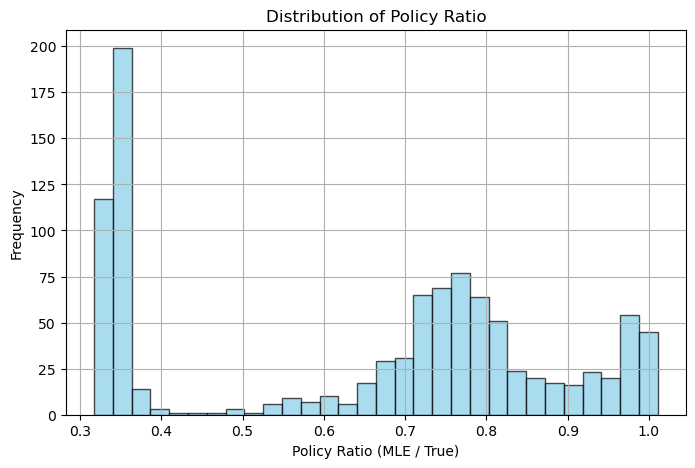

In [20]:
# Compute the policy ratio array
policy_ratio = total_reward_array[0, :] / total_reward_array[1, :]

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(policy_ratio, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Policy Ratio (MLE / True)')
plt.ylabel('Frequency')
plt.title('Distribution of Policy Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Example usage of infeasible policy
r = 0.1
T0 = 0
selecting_rule = 0.5
number_of_timeperiods = 15
number_of_states = 10
number_of_bandit_in_total = 100
path_length = 45
num_paths = 5
pulled_ratio = 0.15
iteration = 50
total_reward_array = np.zeros((2, 100))
total_pull_array = np.zeros((2, 100))
for i in range(1):
    (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
        i,
        number_of_timeperiods,
        number_of_states,
        number_of_bandit_in_total,
        path_length,
        num_paths,
        pulled_ratio,
        r,
        selecting_rule
    )

    objval, pi1_LP_true, pi0_LP_true = fluid_LP(
        T0,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        prob_pull,
        prob_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
    )

    total_reward_array[1,i], total_pull_array[1,i] = monte_carlo_randomized_policy_feasible(
            pi1_LP_true,
            pi0_LP_true,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            init_prob,
            0,
            iteration,
        )

    objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
            0,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            init_prob,
            transition_kernel_pull,
            transition_kernel_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
        )

    total_reward_array[0,i], total_pull_array[0,i] = monte_carlo_randomized_policy_feasible(
                pi1_LP_mle,
                pi0_LP_mle,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
                init_prob,
                0,
                iteration,
            )
    # print(total_reward_array[0,i]/ total_reward_array[1,i])

In [29]:
# Example usage of infeasible policy
r = 0.1
T0 = 0
selecting_rule = 0.5
number_of_timeperiods = 15
number_of_states = 10
number_of_bandit_in_total = 100
path_length = 45
num_paths = 5
iteration = 50
total_reward_array = np.zeros((2, 100))
total_pull_array = np.zeros((2, 100))
(init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
        20,
        number_of_timeperiods,
        number_of_states,
        number_of_bandit_in_total,
        path_length,
        num_paths,
        1,
        r,
        selecting_rule
    )

for i in range(100):
    pulled_ratio = i/100
    objval, pi1_LP_true, pi0_LP_true = fluid_LP(
            T0,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            init_prob,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
        )

    total_reward_array[1,i], total_pull_array[1,i] = monte_carlo_randomized_policy_feasible(
                pi1_LP_true,
                pi0_LP_true,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
                init_prob,
                0,
                iteration,
            )

    objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
                0,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                init_prob,
                transition_kernel_pull,
                transition_kernel_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
            )

    total_reward_array[0,i], total_pull_array[0,i] = monte_carlo_randomized_policy_feasible(
                    pi1_LP_mle,
                    pi0_LP_mle,
                    number_of_timeperiods,
                    number_of_states,
                    reward_donothing,
                    reward_pull,
                    prob_pull,
                    prob_donothing,
                    pulled_ratio,
                    number_of_bandit_in_total,
                    init_prob,
                    0,
                    iteration,
                )

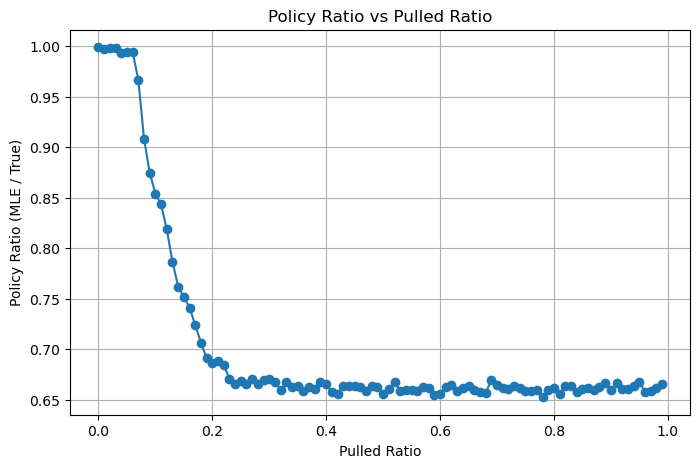

In [30]:
# x-axis: pulled_ratio values (i/100 for i in range(len(total_reward_array[0])))
x = np.arange(len(total_reward_array[0])) / 100
# y-axis: policy ratio
y = total_reward_array[0, :] / total_reward_array[1, :]

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o')
plt.xlabel('Pulled Ratio')
plt.ylabel('Policy Ratio (MLE / True)')
plt.title('Policy Ratio vs Pulled Ratio')
plt.grid(True)
plt.show()

In [43]:
# Example usage of infeasible policy
r = 0.1
T0 = 0
selecting_rule = 0.5
number_of_timeperiods = 15
number_of_states = 10
path_length = 45
num_paths = 5
iteration = 50
total_reward_array = np.zeros((5, 2, 200))
total_pull_array = np.zeros((5, 2, 200))
for j in tqdm(range(5)):
    pulled_ratio = 0.1 * (2*j+1)
    for i in tqdm(range(200)):
        number_of_bandit_in_total = i+10
        (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
        20,
        number_of_timeperiods,
        number_of_states,
        number_of_bandit_in_total,
        path_length,
        num_paths,
        1,
        r,
        selecting_rule
       )
        objval, pi1_LP_true, pi0_LP_true = fluid_LP(
                T0,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                init_prob,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
            )

        total_reward_array[j,1,i], total_pull_array[j,1,i] = monte_carlo_randomized_policy_feasible(
                    pi1_LP_true,
                    pi0_LP_true,
                    number_of_timeperiods,
                    number_of_states,
                    reward_donothing,
                    reward_pull,
                    prob_pull,
                    prob_donothing,
                    pulled_ratio,
                    number_of_bandit_in_total,
                    init_prob,
                    0,
                    iteration,
                )

        objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
                    0,
                    number_of_timeperiods,
                    number_of_states,
                    reward_donothing,
                    reward_pull,
                    init_prob,
                    transition_kernel_pull,
                    transition_kernel_donothing,
                    pulled_ratio,
                    number_of_bandit_in_total,
                )

        total_reward_array[j,0,i], total_pull_array[j,0,i] = monte_carlo_randomized_policy_feasible(
                        pi1_LP_mle,
                        pi0_LP_mle,
                        number_of_timeperiods,
                        number_of_states,
                        reward_donothing,
                        reward_pull,
                        prob_pull,
                        prob_donothing,
                        pulled_ratio,
                        number_of_bandit_in_total,
                        init_prob,
                        0,
                        iteration,
                    )

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/200 [00:00<?, ?it/s]

Markowitz threshold set to 0.1
Markowitz threshold set to 0.1


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


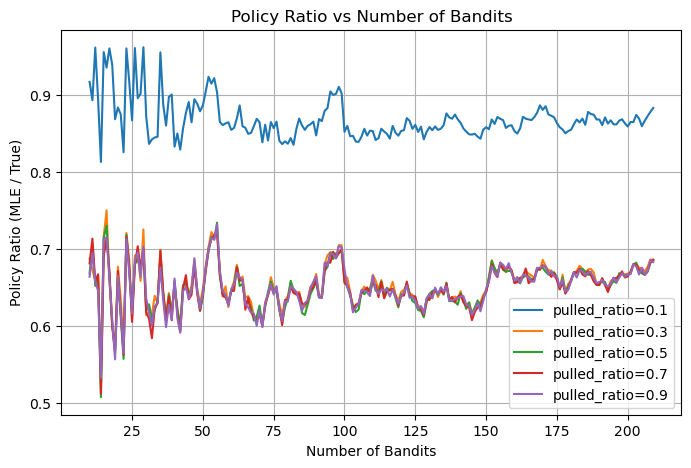

In [46]:
plt.figure(figsize=(8, 5))
i_vals = np.arange(total_reward_array.shape[2]) + 10
plt.plot(i_vals, total_reward_array[0, 0, :] / total_reward_array[0, 1, :], label='pulled_ratio=0.1')
plt.plot(i_vals, total_reward_array[1, 0, :] / total_reward_array[1, 1, :], label='pulled_ratio=0.3')
plt.plot(i_vals, total_reward_array[2, 0, :] / total_reward_array[2, 1, :], label='pulled_ratio=0.5')
plt.plot(i_vals, total_reward_array[3, 0, :] / total_reward_array[3, 1, :], label='pulled_ratio=0.7')
plt.plot(i_vals, total_reward_array[4, 0, :] / total_reward_array[4, 1, :], label='pulled_ratio=0.9')
plt.xlabel('Number of Bandits')
plt.ylabel('Policy Ratio (MLE / True)')
plt.title('Policy Ratio vs Number of Bandits')
plt.legend()
plt.grid(True)
plt.show()

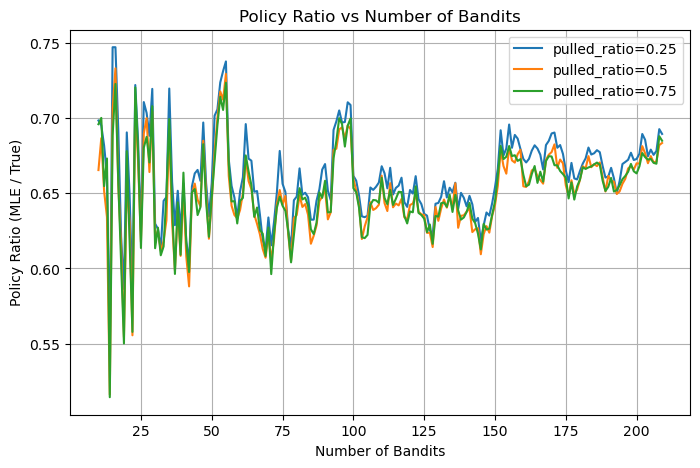

In [42]:
plt.figure(figsize=(8, 5))
i_vals = np.arange(total_reward_array.shape[2]) + 10
plt.plot(i_vals, total_reward_array[0, 0, :] / total_reward_array[0, 1, :], label='pulled_ratio=0.25')
plt.plot(i_vals, total_reward_array[1, 0, :] / total_reward_array[1, 1, :], label='pulled_ratio=0.5')
plt.plot(i_vals, total_reward_array[2, 0, :] / total_reward_array[2, 1, :], label='pulled_ratio=0.75')
plt.xlabel('Number of Bandits')
plt.ylabel('Policy Ratio (MLE / True)')
plt.title('Policy Ratio vs Number of Bandits')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
print(np.sum(total_reward_array[0, :]) / np.sum(total_reward_array[1, :]))
print(np.mean(total_reward_array[0, :]/total_reward_array[1, :]))
print(np.sum(total_pull_array[0, :]) / np.sum(total_pull_array[1, :]))

0.7158113886819218
nan
0.506397143959861


C:\Users\Fupeng Sun\AppData\Local\Temp\ipykernel_5684\2467160912.py:2: RuntimeWarning: invalid value encountered in divide
  print(np.mean(total_reward_array[0, :]/total_reward_array[1, :]))


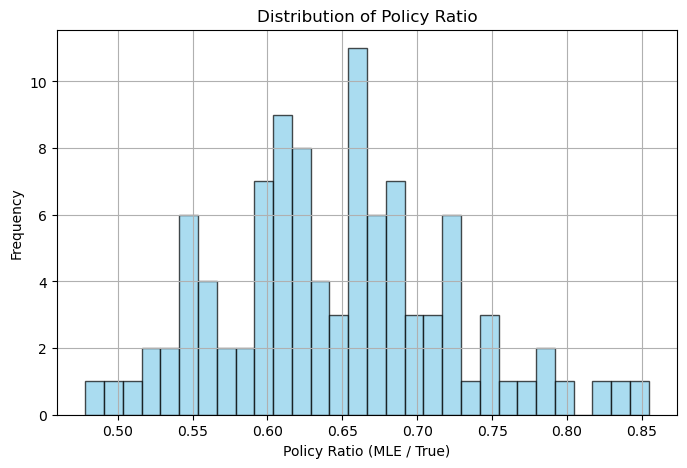

In [23]:
# Compute the policy ratio array
policy_ratio = total_reward_array[0, :] / total_reward_array[1, :]

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(policy_ratio, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Policy Ratio (MLE / True)')
plt.ylabel('Frequency')
plt.title('Distribution of Policy Ratio')
plt.grid(True)
plt.show()

#### **Part 4: Implement the subgradient method and its infeasible/feasible policy**

In [30]:
def get_primal_solution(v: np.ndarray, p_lower: np.ndarray, p_upper: np.ndarray, mu_star: float) -> np.ndarray:
    """
    Compute the optimal primal solution for the given dual variables and bounds.

    Args:
        v (np.ndarray): Array of dual variables.
        p_lower (np.ndarray): Lower bounds for the primal variables.
        p_upper (np.ndarray): Upper bounds for the primal variables.
        mu_star (float): Optimal dual variable.

    Returns:
        np.ndarray: Optimal primal solution.
    """
    n = len(v)
    p_star = np.zeros(n)
    
    # Initialize p_star based on complementary slackness
    p_star = np.where(mu_star > v, p_lower, p_star)
    p_star = np.where(mu_star < v, p_upper, p_star)
    equal_mask = mu_star == v
    p_star[equal_mask] = (p_lower[equal_mask] + p_upper[equal_mask]) / 2
    
    # Calculate the current sum of p_star
    current_sum = np.sum(p_star)
    
    # Adjust p_star to satisfy the constraint sum(p_star) = 1 while respecting the bounds
    adjustable_indices = np.where(equal_mask)[0]
    adjustment = 1 - current_sum
    adjustment_per_index = adjustment / len(adjustable_indices) if len(adjustable_indices) > 0 else 0
    p_star[adjustable_indices] += adjustment_per_index
    p_star[adjustable_indices] = np.clip(p_star[adjustable_indices], p_lower[adjustable_indices], p_upper[adjustable_indices])
    
    # current_sum = np.sum(p_star)
    # remaining_adjustment = 1 - current_sum
    # max_adjustment = np.where(remaining_adjustment > 0, p_upper - p_star, p_star - p_lower)
    # adjustment_amount = np.minimum(np.abs(remaining_adjustment), max_adjustment)
    # p_star += np.sign(remaining_adjustment) * adjustment_amount * equal_mask
    
    return p_star

def solve_dual_problem(prob_true: np.ndarray, value_last_time: np.ndarray, radius: np.ndarray, number_of_states: int) -> Tuple[float, np.ndarray]:
    """
    Solve the Interval Matrix Model using bisection search.

    Args:
        prob_true (np.ndarray): 1D array of transition probabilities (true probabilities).
        value_last_time (np.ndarray): Coefficients for the objective function.
        radius (float): Radius for the ambiguity set.
        number_of_states (int): The number of states.

    Returns:
        Tuple[float, np.ndarray]: Optimal sigma^* and optimal primal solution p_star.
    """
    
    v = -value_last_time
    n = len(v)
    v_sorted = np.sort(v)
    v_sorted = np.insert(v_sorted, 0, 0)  # Insert 0 as v(0)
    
    p_upper = np.minimum(prob_true + radius, 1)
    p_lower = np.maximum(prob_true - radius, 0)
    
    def objective_function(mu: float) -> float:
        term1 = np.sum(np.maximum(0, (p_upper - p_lower) * (mu - v)))
        term2 = np.dot(v, p_upper)
        term3 = mu * (1 - np.sum(p_upper))
        return term1 + term2 + term3
    
    # Bisection search over the sorted v values
    left, right = 0, n
    while left < right:
        mid = (left + right) // 2
        mu_mid = v_sorted[mid]
        mu_mid_plus = v_sorted[mid + 1] if mid + 1 <= n else mu_mid
        
        obj_mid = objective_function(mu_mid)
        obj_mid_plus = objective_function(mu_mid_plus)
        
        left, right = (left, mid) if obj_mid < obj_mid_plus else (mid + 1, right)
    
    optimal_mu = v_sorted[left]
    p_star = get_primal_solution(v, p_lower, p_upper, optimal_mu)
    sigma_star = np.dot(v, p_star)
    sigma_star_checked = objective_function(optimal_mu)
    
    return -sigma_star, p_star, -sigma_star_checked

# # Example usage of solve_dual_problem function
# prob_true = np.array([0.2, 0.2, 0.2, 0.4, 0.0])
# value_last_time = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
# radius = 1
# number_of_states = 5

# sigma_star, p_star, objective_value = solve_dual_problem(prob_true, value_last_time, radius, number_of_states)

# print("Optimal sigma^*:", sigma_star)
# print("Optimal primal solution p^*:", p_star)
# print("Objective function value at optimal mu:", objective_value)


In [31]:
def RLagrangian_relaxation_parallel(
    number_of_timeperiods,
    number_of_states,
    reward_donothing,
    reward_pull,
    init_prob,
    prob_pull,
    prob_donothing,
    pulled_ratio,
    number_of_bandit_in_total,
    radius_pull,
    radius_donothing,
    mu,
    T0,
):
    """
    Solve the robust Lagrangian relaxation using backward induction.

    Args:
        number_of_timeperiods (int): The number of time periods.
        number_of_states (int): The number of states.
        reward_donothing (numpy.ndarray): A 2D array of rewards for the donothing action.
        reward_pull (numpy.ndarray): A 2D array of rewards for the pull action.
        init_prob (numpy.ndarray): A 2D array of initial probabilities.
        prob_pull (numpy.ndarray): A 3D array of transition probabilities for pull action.
        prob_donothing (numpy.ndarray): A 3D array of transition probabilities for do-nothing action.
        pulled_ratio (float): The maximum percentage of bandits that can be pulled.
        number_of_bandit_in_total (int): Total number of bandits.
        radius_pull (numpy.ndarray): Radius of ambiguity set for pull action.
        radius_donothing (numpy.ndarray): Radius of ambiguity set for do-nothing action.
        mu (float): Lagrangian multiplier.
        T0 (int): End time of backward induction.
        num_proc (int): Number of processes for parallelization.

    Returns:
        tuple: (value, action, RLgradient_T0, Rprob_pull, Rprob_donothing, RLvalue_T0)
    """

    # Initialize value, action, gradient, and Rprob arrays
    value = np.zeros((number_of_timeperiods, number_of_bandit_in_total, number_of_states))
    action = np.zeros((number_of_timeperiods, number_of_bandit_in_total, number_of_states))
    gradient = np.zeros((number_of_timeperiods, number_of_bandit_in_total, number_of_states))
    pull_value_batch = np.zeros((number_of_bandit_in_total, number_of_states))
    donothing_value_batch = np.zeros((number_of_bandit_in_total, number_of_states))
    Rprob_pull_batch = np.zeros((number_of_timeperiods, number_of_bandit_in_total, number_of_states, number_of_states))
    Rprob_donothing_batch = np.zeros((number_of_timeperiods, number_of_bandit_in_total, number_of_states, number_of_states))

    reward_at_time_pull = np.array(reward_pull)
    reward_at_time_donothing = np.array(reward_donothing)
    value[number_of_timeperiods - 1] = np.where(reward_at_time_pull > mu + reward_at_time_donothing, reward_at_time_pull - mu, reward_at_time_donothing)
    action[number_of_timeperiods - 1] = np.where(reward_at_time_pull > mu + reward_at_time_donothing, 1, 0)
    gradient[number_of_timeperiods - 1] = np.where(reward_at_time_pull > mu + reward_at_time_donothing, -1, 0)

    # Backward induction
    for tau in range(1, number_of_timeperiods - T0):
        time_index = number_of_timeperiods - tau - 1

        # Prepare LP problems for parallel solving
        for j in range(number_of_bandit_in_total):
            for k in range(number_of_states):
                pull_value_batch[j][k], Rprob_pull_batch[time_index][j][k], _ = solve_dual_problem(prob_pull[j][k], value[time_index + 1][j], radius_pull[time_index][j][k], number_of_states)
                donothing_value_batch[j][k], Rprob_donothing_batch[time_index][j][k], _ = solve_dual_problem(prob_donothing[j][k], value[time_index + 1][j], radius_donothing[time_index][j][k], number_of_states)
        
        pull_value = reward_pull - mu + pull_value_batch
        donothing_value = reward_donothing + donothing_value_batch

        # Stack pull_value and donothing_value_batch along a new axis (axis=-1)
        stacked_values = np.stack([donothing_value, pull_value], axis=-1)

        # Take the max along the new axis
        value[time_index] = np.max(stacked_values, axis=-1)

        # Take the argmax along the new axis to determine the action
        action[time_index] = np.argmax(stacked_values, axis=-1)

        # Perform the matrix multiplication using einsum
        pull_prob = np.einsum("ijk,ik->ij", Rprob_pull_batch[time_index], gradient[time_index + 1])
        donothing_prob = np.einsum("ijk,ik->ij", Rprob_donothing_batch[time_index], gradient[time_index + 1])

        # Update gradient using matrix form
        gradient[time_index] = -action[time_index] + action[time_index] * pull_prob + (1 - action[time_index]) * donothing_prob

    # Compute weighted value and gradient at T0
    weighted_value = np.sum(np.multiply(value[T0], init_prob))
    weighted_gradient = np.sum(np.multiply(gradient[T0], init_prob))

    # Compute final RLvalue_T0 and RLgradient_T0
    RLvalue_T0 = (number_of_timeperiods - T0) * number_of_bandit_in_total * pulled_ratio * mu + weighted_value
    RLgradient_T0 = (number_of_timeperiods - T0) * number_of_bandit_in_total * pulled_ratio + weighted_gradient

    return value, action, RLgradient_T0, Rprob_pull_batch, Rprob_donothing_batch, RLvalue_T0

# # Example usage of RLagrangian_relaxation_parallel
# sample_idx = 10
# r = 0
# T0 = 0
# mu = 0.3
# selecting_rule = 0.6
# number_of_timeperiods = 15
# number_of_states = 6
# number_of_bandit_in_total = 100
# path_length = 15
# num_paths = 5
# pulled_ratio = 0.25
# iteration = 1000

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )

# value, action, RLgradient_T0, Rprob_pull_batch, Rprob_donothing_batch, RLvalue_T0 = RLagrangian_relaxation_parallel(
#     number_of_timeperiods,
#     number_of_states,
#     reward_donothing,
#     reward_pull,
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     pulled_ratio,
#     number_of_bandit_in_total,
#     radius_pull,
#     radius_donothing,
#     mu,
#     T0,
# )
# print("RLvalue_T0:", RLvalue_T0)
# print("RLgradient_T0:", RLgradient_T0)

sample_idx: 44


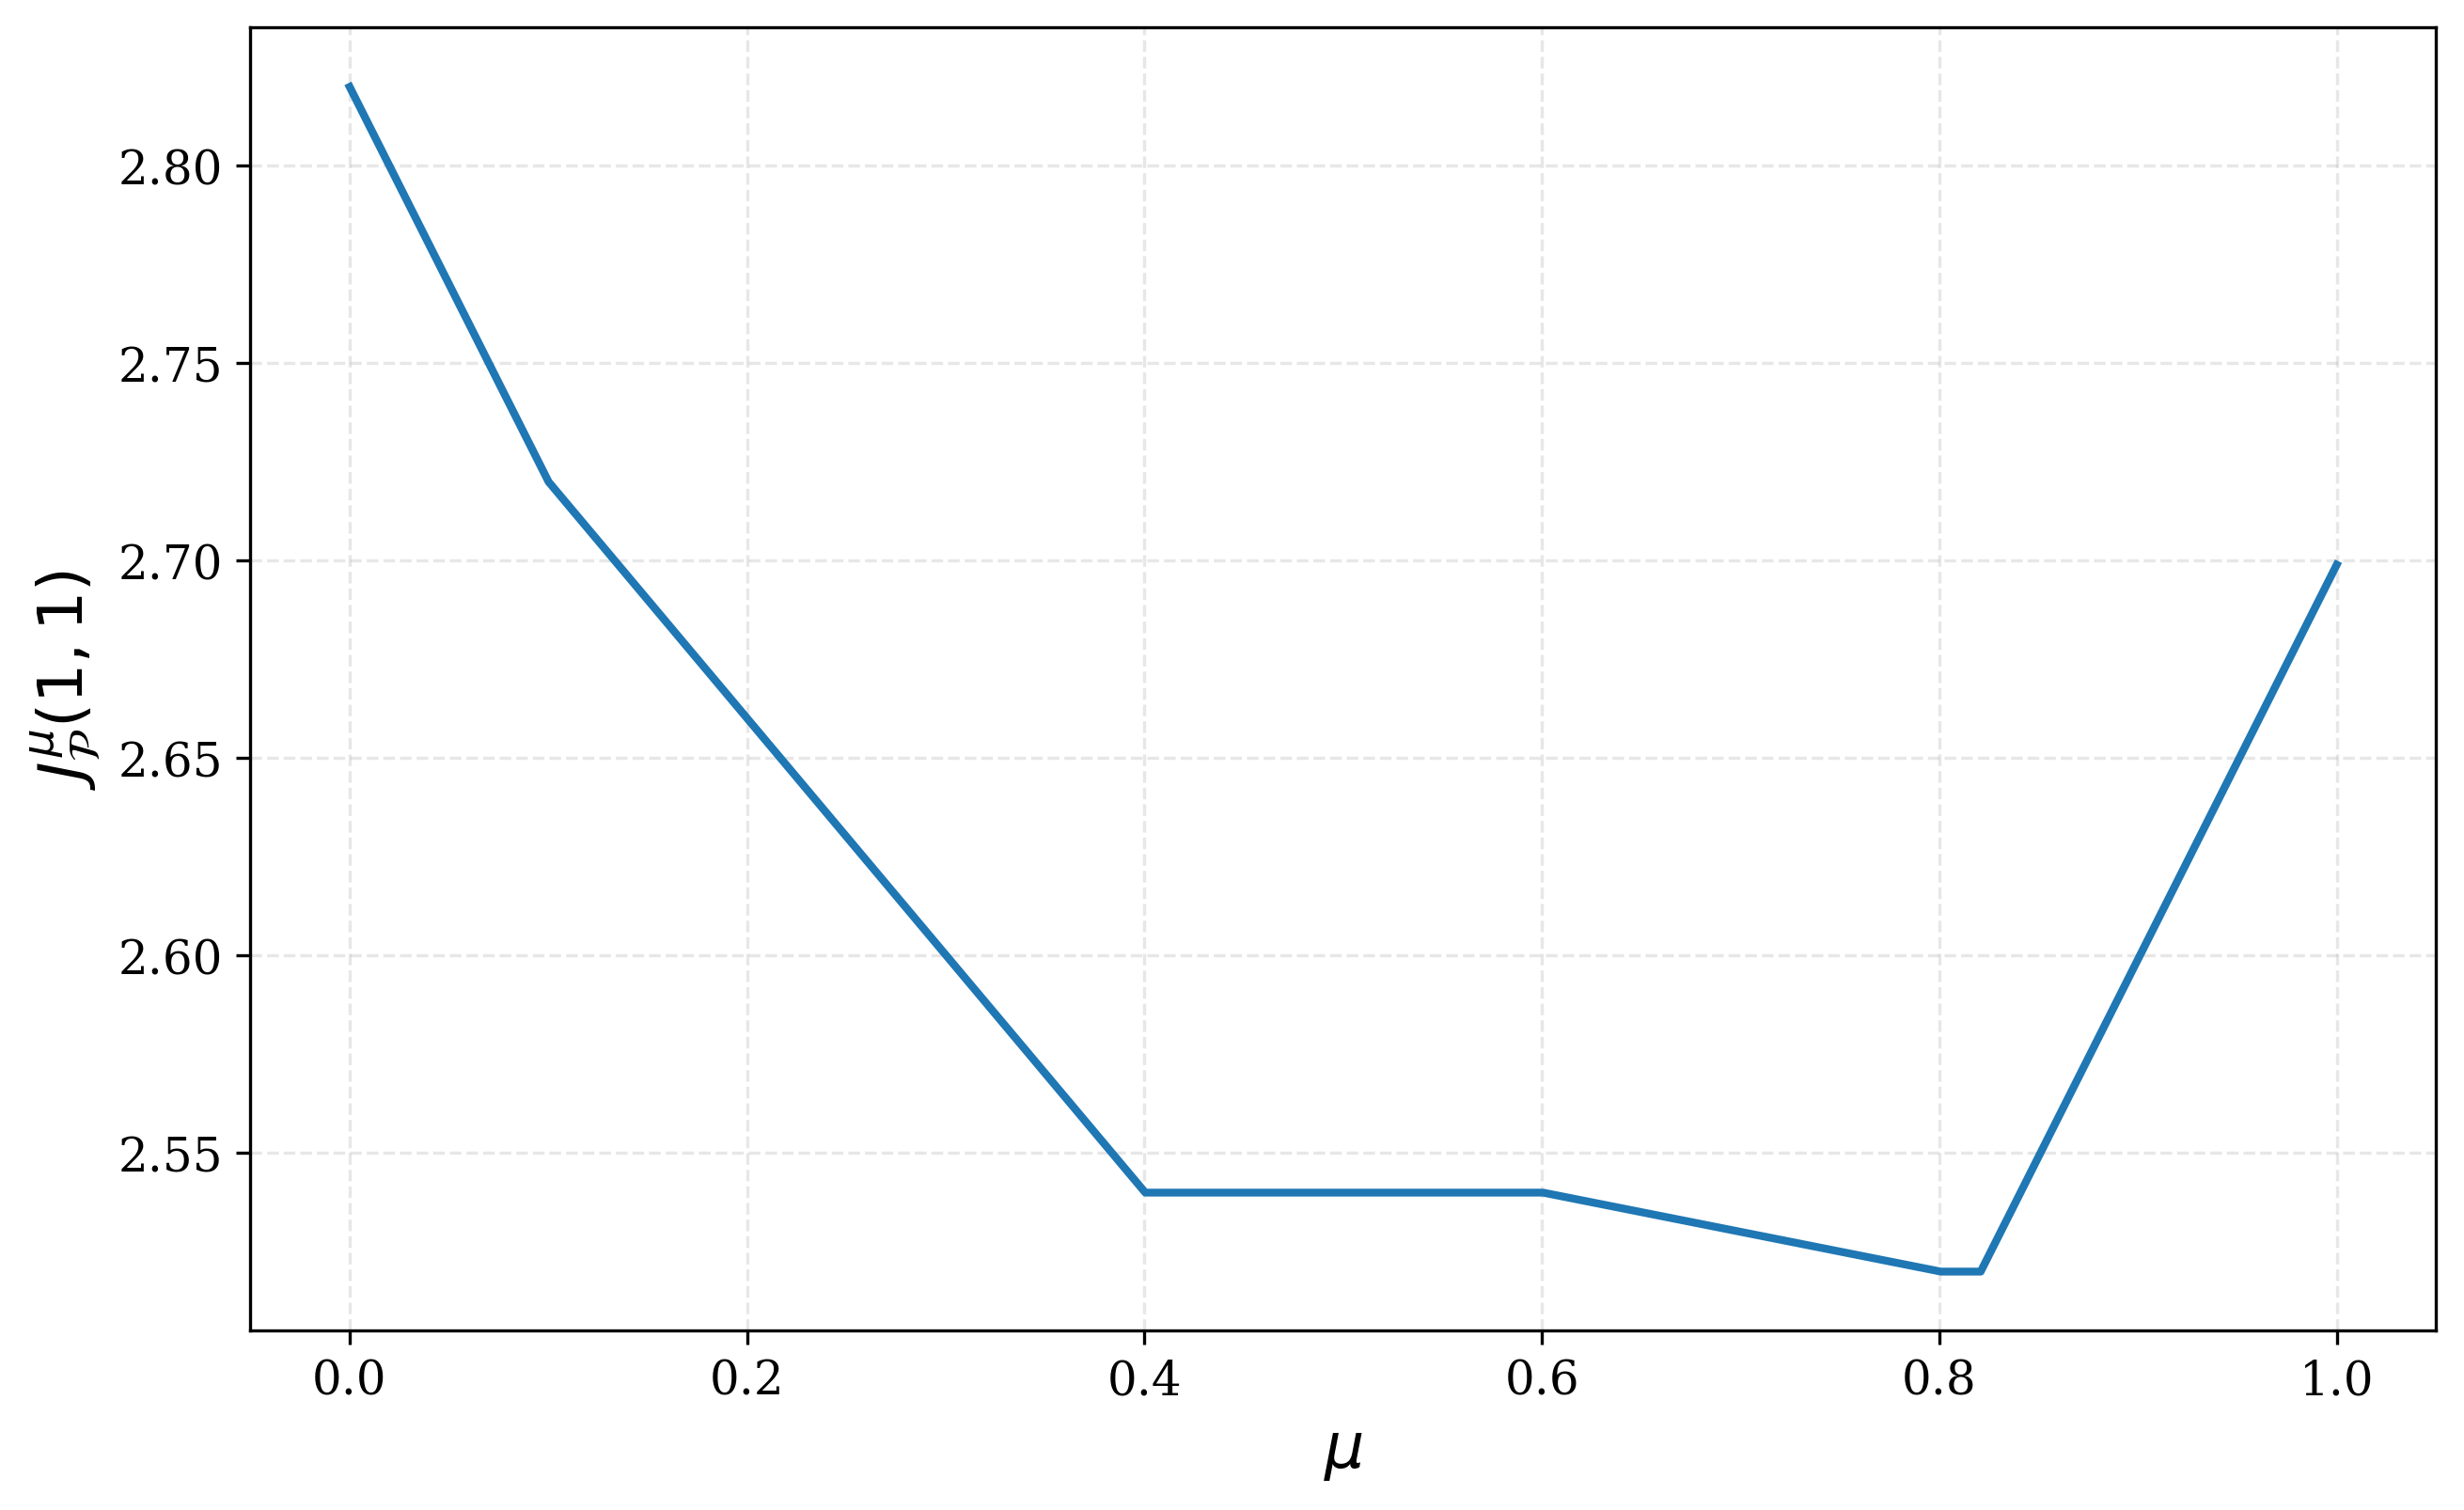

In [470]:
# Example usage of RLagrangian_relaxation_parallel
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = False  # This avoids the error
r = 0.1
T0 = 0
number_of_timeperiods = 2
number_of_states = 7
number_of_bandit_in_total = 2
pulled_ratio = 0.5

for sample_idx in range(44, 45):
    random.seed(int(sample_idx))
    np.random.seed(int(sample_idx))
    print("sample_idx:", sample_idx)    
    init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull = initialization(number_of_bandit_in_total, number_of_states, number_of_timeperiods)
    # print(reward_pull)
    # print(reward_donothing)
    reward_pull = np.array([
        [1, 0.8, 0.2, 0.5, 0.5, 0.5, 0.5],
        [0.6, 0.2, 0.4, 0.1, 0.5, 0.5, 0.1]
    ])
    reward_donothing = np.array([
        [0.2, 0.4, 0.7, 0.8, 0.8, 0.8, 0.8],
        [0.1, 0.1, 0.9, 0.3, 0.3, 0.3, 0.3]
    ])
    radius = r * np.ones(
            (
                number_of_timeperiods,
                number_of_bandit_in_total,
                2,
                number_of_states,
                number_of_states,
            )
        )
    radius_pull = radius[:, :, 1, :, :]
    radius_donothing = radius[:, :, 0, :, :]

    init_prob = np.array(
            [[1, 0, 0, 0, 0, 0, 0] for _ in range(number_of_bandit_in_total)]
        )

    Jmu = np.zeros(1000)
    for i in range(1000):
        Jmu[i] = RLagrangian_relaxation_parallel(
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            init_prob,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            radius_pull,
            radius_donothing,
            i / 1000,
            T0,
        )[5]
    # Create x-axis values (mu values from 0 to 0.999)
    mu_values = np.linspace(0, 1, 1000)

    # Plot Jmu against mu_values
    plt.figure(figsize=(10, 6))
    plt.plot(mu_values, Jmu)    
    plt.xlabel('$\mu$')
    plt.ylabel('$J_{{\mathcal{P}}}^{\mu}(1, 1)$')
    plt.grid(True)
    # plt.axvline(mu_values[np.argmin(Jmu)], color='r', linestyle='--', 
    #             label=f'Optimal μ = {mu_values[np.argmax(Jmu)]:.4f}')
    plt.show() 

In [32]:
def subgradient(
    lr,
    number_of_timeperiods,
    number_of_states,
    reward_donothing,
    reward_pull,
    init_prob,
    prob_pull,
    prob_donothing,
    pulled_ratio,
    number_of_bandit_in_total,
    radius_pull,
    radius_donothing,
    T0,
):
    """
    Solve the robust weakly coupled MDP using subgradient.

    Args:
    lr (float): Learning rate for the subgradient method.
    number_of_timeperiods (int): The number of time periods.
    number_of_states (int): The number of states.
    reward_donothing (numpy.ndarray): A 2D array of rewards of donothing action.
    reward_pull (numpy.ndarray): A 2D array of rewards of pull action.
    init_prob (numpy.ndarray): A 2D array of initial probabilities.
    prob_pull (numpy.ndarray): A 3D array of transition probabilities of pull action.
    prob_donothing (numpy.ndarray): A 3D array of transition probabilities of donothing action.
    pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
    number_of_bandit_in_total (int): The total number of bandits.
    radius_pull (numpy.ndarray): The array to store the radius of the ambiguity set of pull action.
    radius_donothing (numpy.ndarray): The array to store the radius of the ambiguity set of donothing action.
    T0 (int): End time of backward induction.

    Returns:
    tuple: The objective value of the solved robust Lagrangian relaxation, and the optimal solutions.
    """
    iterations = 50
    learning_rate = lr

    # Initialize Lagrangian parameter
    mu_GD = np.zeros((iterations))
    mu_GD[0] = random.random()

    # Initialize trackers for the training process
    costs = np.zeros((iterations))
    gradient = np.zeros((iterations))
    value = [None] * iterations
    action = [None] * iterations
    Rprob_pull_batch = [None] * iterations
    Rprob_donothing_batch = [None] * iterations

    # Initial computation
    (
        value[0],
        action[0],
        gradient[0],
        Rprob_pull_batch[0],
        Rprob_donothing_batch[0],
        costs[0],
    ) = RLagrangian_relaxation_parallel(
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        prob_pull,
        prob_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
        radius_pull,
        radius_donothing,
        mu_GD[0],
        T0,
    )

    # Training loop
    for i in tqdm(range(iterations - 1)):
        # Update Lagrangian parameter using subgradient method
        mu_GD[i + 1] = max(mu_GD[i] - gradient[i] * learning_rate/(i+1), 0)
        
        # Compute new values based on updated parameter
        (
            value[i + 1],
            action[i + 1],
            gradient[i + 1],
            Rprob_pull_batch[i + 1],
            Rprob_donothing_batch[i + 1],
            costs[i + 1],
        ) = RLagrangian_relaxation_parallel(
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            init_prob,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            radius_pull,
            radius_donothing,
            mu_GD[i + 1],
            T0,
        )

    # Find the minimum cost and corresponding parameters
    rsl = np.min(costs)
    idx = np.argmin(costs)
    mu_star = mu_GD[idx]

    return (
        rsl,
        mu_star,
        value[idx],
        action[idx],
        gradient[idx],
        Rprob_pull_batch[idx],
        Rprob_donothing_batch[idx],
    )

# # Example usage of subgradient function
# sample_idx = 20
# r = 0
# T0 = 0
# selecting_rule = 0.5
# number_of_timeperiods = 15
# number_of_states = 10
# number_of_bandit_in_total = 100
# path_length = 70
# num_paths = 5
# pulled_ratio = 0.25
# iteration = 500

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )

# objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
#         0,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#     )


# (       
#         Robust_Lagrangian_relaxation_subgradient,
#         mu_star,
#         value,
#         action,
#         gradient,
#         Rprob_pull_batch,
#         Rprob_donothing_batch,
#     ) = subgradient(
#         0.01,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         radius_pull,
#         radius_donothing,
#         T0=0,
#     )
    
# print(f"Fluid LP objective value MLE: {objval_mle}")
# print(f"Subgradient objective value: {Robust_Lagrangian_relaxation_subgradient}")
# print(f"Gradient: {gradient}")
# print(f"Mu star: {mu_star}")

In [33]:
def Rlagrangian_policy_infeasible(
    number_of_timeperiods: int,
    number_of_bandit_in_total: int,
    number_of_states: int,
    pulled_ratio: float,
    mu_star: float,
    value: np.ndarray,
    Rprob_pull_batch: np.ndarray,
    Rprob_donothing_batch: np.ndarray,
    initial_prob: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    iterations: int,
    sample_idx: int,
) -> Tuple[float, float]:
    """
    Simulate a randomized policy for Rlagrangian with gradient descent.

    Args:
        number_of_timeperiods (int): The number of time periods.
        number_of_bandit_in_total (int): The total number of bandits.
        number_of_states (int): The number of states.
        pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
        mu_star (float):optimal mu obtained by the subgradient method.
        value (np.ndarray): A 3D array of optimal value function of the Rlagrangian with gradient descent.
        Rprob_pull_batch (np.ndarray): A 4D array of optimal Rprob for pull action of the Rlagrangian with gradient descent.
        Rprob_donothing_batch (np.ndarray): A 4D array of optimal Rprob for do-nothing action of the Rlagrangian with gradient descent.
        initial_prob (np.ndarray): A 2D array of initial probabilities.
        prob_pull (np.ndarray): A 3D array of transition probabilities for pull action.
        prob_donothing (np.ndarray): A 3D array of transition probabilities for do-nothing action.
        reward_donothing (np.ndarray): A 2D array of rewards for donothing action.
        reward_pull (np.ndarray): A 2D array of rewards for pull action.
        iterations (int): The number of iterations for the simulation.

    Returns:
        Tuple[float, float]: The average total reward and the average number of active bandits.
    """
    total_reward = 0.0
    active_bandit_number = 0
    np.random.seed(sample_idx)
    for _ in range(iterations):
        # Initialization of state for each arm based on the initial probability
        arm_state = np.array(
            [
                np.random.choice(number_of_states, p=initial_prob[j])
                for j in range(number_of_bandit_in_total)
            ]
        )

        # Vectorized simulation for each time period
        for t in range(number_of_timeperiods):
            difference = Rprob_pull_batch[t] - Rprob_donothing_batch[t]
            weight = np.einsum("jkl,jl->jk", difference, value[t + 1]) + reward_pull - reward_donothing - mu_star if t < number_of_timeperiods - 1 else reward_pull - reward_donothing - mu_star
            active = weight[np.arange(number_of_bandit_in_total), arm_state]
            action = (active > 0).astype(int)
            state_idx_pull = np.where(action > 0)[0]
            state_idx_donothing = np.where(action == 0)[0]

            # Update total reward and arm states based on actions (vectorized)
            reward_for_pulled = reward_pull[np.arange(number_of_bandit_in_total), arm_state] * action
            reward_for_donothing = reward_donothing[np.arange(number_of_bandit_in_total), arm_state] * (1 - action)
            total_reward += np.sum(reward_for_pulled + reward_for_donothing)

            # Update the state of pulled arms based on transition probabilities (vectorized)
            arm_state[state_idx_pull] = generate_number_in_dist_batch(
            prob_pull[state_idx_pull, arm_state[state_idx_pull], :]
            )
            arm_state[state_idx_donothing] = generate_number_in_dist_batch(
            prob_donothing[state_idx_donothing, arm_state[state_idx_donothing], :]
            )
            active_bandit_number += np.sum(action)

    return total_reward / iterations, active_bandit_number / (number_of_timeperiods * iterations)

# # Example usage of infeasible policy of subgradient
# sample_idx = 20
# r = 0
# T0 = 0
# selecting_rule = 0.5
# number_of_timeperiods = 15
# number_of_states = 10
# number_of_bandit_in_total = 100
# path_length = 45
# num_paths = 5
# pulled_ratio = 0.25
# iteration = 1000

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )

# objval, pi1_LP_true, pi0_LP_true = fluid_LP(
#     T0,
#     number_of_timeperiods,
#     number_of_states,
#     reward_donothing,
#     reward_pull,
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     pulled_ratio,
#     number_of_bandit_in_total,
# )

# infeasible_total_reward_true, _ = monte_carlo_randomized_policy_infeasible(
#         pi1_LP_true,
#         pi0_LP_true,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         prob_pull,
#         prob_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         init_prob,
#         0,
#         iteration,
#         sample_idx,
#     )

# objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
#         0,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#     )

# infeasible_total_reward_mle, infeasible_active_bandit_number_mle = monte_carlo_randomized_policy_infeasible(
#             pi1_LP_mle,
#             pi0_LP_mle,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             prob_pull,
#             prob_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             init_prob,
#             0,
#             iteration,
#             sample_idx,
#         )

# (       
#         Robust_Lagrangian_relaxation_subgradient,
#         mu_star,
#         value,
#         action,
#         gradient,
#         Rprob_pull_batch,
#         Rprob_donothing_batch,
#     ) = subgradient(
#         0.01,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         radius_pull,
#         radius_donothing,
#         T0=0,
#     )

# infeasible_Lag_total_reward_mle, infeasible_active_bandit_number_Lag = Rlagrangian_policy_infeasible(
#             number_of_timeperiods,
#             number_of_bandit_in_total,
#             number_of_states,
#             pulled_ratio,
#             mu_star,
#             value,
#             Rprob_pull_batch,
#             Rprob_donothing_batch,
#             init_prob,
#             prob_pull,
#             prob_donothing,
#             reward_donothing,
#             reward_pull,
#             iteration,
#             sample_idx,
#         )
   
# print(f"Fluid LP objective value truth: {objval}")
# print(f"Fluid LP policy truth: {infeasible_total_reward_true}")
# print(f"Fluid LP objective value MLE: {objval_mle}")
# print(f"Fluid LP policy MLE: {infeasible_total_reward_mle}")
# print(f"Subgradient objective value: {Robust_Lagrangian_relaxation_subgradient}")
# print(f"Subgradient infeasible policy: {infeasible_Lag_total_reward_mle}")
# print(f"Gradient: {gradient}")
# print(f"Optimal mu: {mu_star}")

In [34]:
def Rlagrangian_policy_feasible(
    number_of_timeperiods: int,
    number_of_bandit_in_total: int,
    number_of_states: int,
    pulled_ratio: float,
    mu_star: float,
    value: np.ndarray,
    Rprob_pull_batch: np.ndarray,
    Rprob_donothing_batch: np.ndarray,
    initial_prob: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    iterations: int,
    sample_idx: int,
) -> Tuple[float, float]:
    """
    Simulate a randomized policy for Rlagrangian with gradient descent.

    Args:
        number_of_timeperiods (int): The number of time periods.
        number_of_bandit_in_total (int): The total number of bandits.
        number_of_states (int): The number of states.
        pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
        mu_star (float):optimal mu obtained by the subgradient method.
        value (np.ndarray): A 3D array of optimal value function of the Rlagrangian with gradient descent.
        Rprob_pull_batch (np.ndarray): A 4D array of optimal Rprob for pull action of the Rlagrangian with gradient descent.
        Rprob_donothing_batch (np.ndarray): A 4D array of optimal Rprob for do-nothing action of the Rlagrangian with gradient descent.
        initial_prob (np.ndarray): A 2D array of initial probabilities.
        prob_pull (np.ndarray): A 3D array of transition probabilities for pull action.
        prob_donothing (np.ndarray): A 3D array of transition probabilities for do-nothing action.
        reward_donothing (np.ndarray): A 2D array of rewards for donothing action.
        reward_pull (np.ndarray): A 2D array of rewards for pull action.
        iterations (int): The number of iterations for the simulation.

    Returns:
        Tuple[float, float]: The average total reward and the average number of active bandits.
    """
    total_reward = 0.0
    active_bandit_number = 0
    np.random.seed(sample_idx)
    for _ in range(iterations):
        # Initialization of state for each arm based on the initial probability
        arm_state = np.array(
            [
                np.random.choice(number_of_states, p=initial_prob[j])
                for j in range(number_of_bandit_in_total)
            ]
        )

        # Vectorized simulation for each time period
        for t in range(number_of_timeperiods):
            difference = Rprob_pull_batch[t] - Rprob_donothing_batch[t]
            weight = np.einsum("jkl,jl->jk", difference, value[t + 1]) + reward_pull - reward_donothing - mu_star if t < number_of_timeperiods - 1 else reward_pull - reward_donothing - mu_star
            active = weight[np.arange(number_of_bandit_in_total), arm_state]
            action, num_active = random_truncated(
                active,
                number_of_bandit_in_total,
                int(pulled_ratio * number_of_bandit_in_total),
            )
            state_idx_pull = np.where(action > 0)[0]
            state_idx_donothing = np.where(action == 0)[0]

            # Update total reward and arm states based on actions (vectorized)
            reward_for_pulled = reward_pull[np.arange(number_of_bandit_in_total), arm_state] * action
            reward_for_donothing = reward_donothing[np.arange(number_of_bandit_in_total), arm_state] * (1 - action)
            total_reward += np.sum(reward_for_pulled + reward_for_donothing)

            # Update the state of pulled arms based on transition probabilities (vectorized)
            arm_state[state_idx_pull] = generate_number_in_dist_batch(
            prob_pull[state_idx_pull, arm_state[state_idx_pull], :]
            )
            arm_state[state_idx_donothing] = generate_number_in_dist_batch(
            prob_donothing[state_idx_donothing, arm_state[state_idx_donothing], :]
            )
            active_bandit_number += np.sum(action)

    return total_reward / iterations, active_bandit_number / (number_of_timeperiods * iterations)

# # Example usage of infeasible policy of subgradient
# sample_idx = 20
# r = 0.05
# T0 = 0
# selecting_rule = 0.6
# number_of_timeperiods = 15
# number_of_states = 6
# number_of_bandit_in_total = 100
# path_length = 15
# num_paths = 5
# pulled_ratio = 0.25
# iteration = 1000

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )

# objval, pi1_LP_true, pi0_LP_true = fluid_LP(
#     T0,
#     number_of_timeperiods,
#     number_of_states,
#     reward_donothing,
#     reward_pull,
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     pulled_ratio,
#     number_of_bandit_in_total,
# )

# feasible_total_reward_true, _ = monte_carlo_randomized_policy_feasible(
#         pi1_LP_true,
#         pi0_LP_true,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         prob_pull,
#         prob_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         init_prob,
#         0,
#         iteration,
#     )

# objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
#         0,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#     )

# feasible_total_reward_mle, feasible_active_bandit_number_mle = monte_carlo_randomized_policy_feasible(
#             pi1_LP_mle,
#             pi0_LP_mle,
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             prob_pull,
#             prob_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             init_prob,
#             0,
#             iteration,
#         )

# (       
#         Robust_Lagrangian_relaxation_subgradient,
#         mu_star,
#         value,
#         action,
#         gradient,
#         Rprob_pull_batch,
#         Rprob_donothing_batch,
#     ) = subgradient(
#         0.005,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         init_prob,
#         transition_kernel_pull,
#         transition_kernel_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         radius_pull,
#         radius_donothing,
#         T0=0,
#     )

# feasible_Lag_total_reward_mle, feasible_active_bandit_number_Lag = Rlagrangian_policy_feasible(
#             number_of_timeperiods,
#             number_of_bandit_in_total,
#             number_of_states,
#             pulled_ratio,
#             mu_star,
#             value,
#             Rprob_pull_batch,
#             Rprob_donothing_batch,
#             init_prob,
#             prob_pull,
#             prob_donothing,
#             reward_donothing,
#             reward_pull,
#             iteration,
#         )
   
# print(f"Fluid LP objective value truth: {objval}")
# print(f"Fluid LP feasible policy truth: {feasible_total_reward_true}")
# print(f"Fluid LP objective value MLE: {objval_mle}")
# print(f"Fluid LP feasible policy MLE: {feasible_total_reward_mle}")
# print(f"Subgradient objective value: {Robust_Lagrangian_relaxation_subgradient}")
# print(f"Subgradient feasible policy: {feasible_Lag_total_reward_mle}")
# print(f"Gradient: {gradient}")
# print(f"Optimal mu: {mu_star}")

#### **Part 5: Implement pure random policy**

In [35]:
def random_infeasible(
    number_of_timeperiods: int,
    number_of_states: int,
    reward_donothing: np.ndarray,
    reward_pull: np.ndarray,
    prob_pull: np.ndarray,
    prob_donothing: np.ndarray,
    pulled_ratio: float,
    number_of_bandit_in_total: int,
    init_prob: np.ndarray,
    iterations: int,
    sample_idx: int,
) -> Tuple[float, float]:
    """
    Simulate a Monte Carlo randomized policy for an infeasible solution.

    Args:
        number_of_timeperiods (int): The number of time periods.
        number_of_states (int): The number of states.
        reward_donothing (np.ndarray): A 2D array of rewards for the donothing action.
        reward_pull (np.ndarray): A 2D array of rewards for the pull action.
        prob_pull (np.ndarray): A 3D array of transition probabilities for the pull action.
        pulled_ratio (float): The maximum percentage of bandits that are allowed to be pulled.
        number_of_bandit_in_total (int): The total number of bandits.
        init_prob (np.ndarray): A 2D array of initial probabilities.

    Returns:
        Tuple[float, float]: The average total reward and the average number of active bandits.
    """
    total_reward = 0.0
    active_bandit_number = 0
    np.random.seed(sample_idx)
    for _ in range(iterations):
        # Initialization of state for each arm based on the initial probability
        arm_state = np.array(
            [
                np.random.choice(number_of_states, p=init_prob[j])
                for j in range(number_of_bandit_in_total)
            ]
        )

        # Vectorized simulation for each time period
        for t in range(number_of_timeperiods):
            active_probs = np.ones(number_of_bandit_in_total) * pulled_ratio
            # Randomly determine which arms are active based on the active probabilities (vectorized)
            random_values = np.random.rand(number_of_bandit_in_total)
            active = random_values < active_probs

            # Calculate the weights (1 if active, else 0)
            
            action = np.where(active, 1, 0)
            state_idx_pull = np.where(action > 0)[0]
            state_idx_donothing = np.where(action == 0)[0]
            
            # Update total reward and arm states based on actions (vectorized)
            reward_for_pulled = reward_pull[np.arange(number_of_bandit_in_total), arm_state] * action
            reward_for_donothing = reward_donothing[np.arange(number_of_bandit_in_total), arm_state] * (1 - action)
            total_reward += np.sum(reward_for_pulled + reward_for_donothing)

            # Update the state of pulled arms based on transition probabilities (vectorized)
            arm_state[state_idx_pull] = generate_number_in_dist_batch(
                prob_pull[state_idx_pull, arm_state[state_idx_pull], :]
            )
            
            arm_state[state_idx_donothing] = generate_number_in_dist_batch(
                prob_donothing[state_idx_donothing, arm_state[state_idx_donothing], :]
            )    
            active_bandit_number += np.sum(action)

    return total_reward / iterations, active_bandit_number / (iterations * number_of_timeperiods)

# # Example usage of random policy
# sample_idx = 10
# r = 0.06
# T0 = 0
# selecting_rule = 0.6
# number_of_timeperiods = 15
# number_of_states = 6
# number_of_bandit_in_total = 100
# path_length = 15
# num_paths = 5
# pulled_ratio = 0.25
# iteration = 1000

# (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
#     sample_idx,
#     number_of_timeperiods,
#     number_of_states,
#     number_of_bandit_in_total,
#     path_length,
#     num_paths,
#     pulled_ratio,
#     r,
#     selecting_rule
# )


# objval, pi1_LP_true, pi0_LP_true = fluid_LP(
#     T0,
#     number_of_timeperiods,
#     number_of_states,
#     reward_donothing,
#     reward_pull,
#     init_prob,
#     prob_pull,
#     prob_donothing,
#     pulled_ratio,
#     number_of_bandit_in_total,
# )

# infeasible_total_reward_true, _ = monte_carlo_randomized_policy_infeasible(
#         pi1_LP_true,
#         pi0_LP_true,
#         number_of_timeperiods,
#         number_of_states,
#         reward_donothing,
#         reward_pull,
#         prob_pull,
#         prob_donothing,
#         pulled_ratio,
#         number_of_bandit_in_total,
#         init_prob,
#         0,
#         iteration,
#     )

# infeasible_total_reward_random, infeasible_total_number_random = random_infeasible(
#             number_of_timeperiods,
#             number_of_states,
#             reward_donothing,
#             reward_pull,
#             prob_pull,
#             prob_donothing,
#             pulled_ratio,
#             number_of_bandit_in_total,
#             init_prob,
#             iteration,
#         )

# print(f"Fluid LP objective value truth: {objval}")
# print(f"Fluid LP infeasible policy truth: {infeasible_total_reward_true}")
# print(f"Pure random infeasible policy: {infeasible_total_reward_random}")

#### **Part 6: Put all policy together**

In [50]:
def policy_ratio_Lag(
    number_of_timeperiods,
    number_of_bandit_in_total,
    number_of_states,
    init_prob,
    prob_pull,
    prob_donothing,
    reward_donothing,
    reward_pull,
    initial_prob,
    transition_kernel_pull,
    transition_kernel_donothing,
    pulled_ratio,
    radius_pull,
    radius_donothing,
    iterations,
    sample_idx,
):

    # print("\n*****************Fluid LP *******************************")
    objval, pi1_LP_true, pi0_LP_true = fluid_LP(
        0,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        prob_pull,
        prob_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
    )
    
    infeasible_total_reward_true, _ = monte_carlo_randomized_policy_infeasible(
        pi1_LP_true,
        pi0_LP_true,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        prob_pull,
        prob_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
        init_prob,
        0,
        iterations,
        sample_idx,
    )
    
    objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
        0,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        transition_kernel_pull,
        transition_kernel_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
    )

    infeasible_total_reward_mle, infeasible_active_bandit_number_mle = monte_carlo_randomized_policy_infeasible(
                pi1_LP_mle,
                pi0_LP_mle,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
                init_prob,
                0,
                iterations,
                sample_idx,
            )

    feasible_total_reward_mle, feasible_active_bandit_number_mle = monte_carlo_randomized_policy_feasible(
                pi1_LP_mle,
                pi0_LP_mle,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
                init_prob,
                0,
                iterations,
                sample_idx,
            )
    
    Robjval_mle_c_b, Rpi1_LP_mle_c_b, Rpi0_LP_mle_c_b = constant_decision_rule_LP(
            0,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            init_prob,
            transition_kernel_pull,
            transition_kernel_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            radius_pull,
            radius_donothing,
            change=1,
        )

    infeasible_Rtotal_reward_mle_c_b, infeasible_active_bandit_number_Rmle_c_b = monte_carlo_randomized_policy_infeasible(
            Rpi1_LP_mle_c_b,
            Rpi0_LP_mle_c_b,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            init_prob,
            0,
            iterations,
            sample_idx,
        )

    feasible_Rtotal_reward_mle_c_b, feasible_active_bandit_number_Rmle_c_b = monte_carlo_randomized_policy_feasible(
            Rpi1_LP_mle_c_b,
            Rpi0_LP_mle_c_b,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            init_prob,
            0,
            iterations,
            sample_idx,
        )
    
    (       
        Robust_Lagrangian_relaxation_subgradient,
        mu_star,
        value,
        action,
        gradient,
        Rprob_pull_batch,
        Rprob_donothing_batch,
    ) = subgradient(
        0.01,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        transition_kernel_pull,
        transition_kernel_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
        radius_pull,
        radius_donothing,
        T0=0,
    )

    infeasible_Lag_total_reward_mle, infeasible_active_bandit_number_Lag = Rlagrangian_policy_infeasible(
            number_of_timeperiods,
            number_of_bandit_in_total,
            number_of_states,
            pulled_ratio,
            mu_star,
            value,
            Rprob_pull_batch,
            Rprob_donothing_batch,
            init_prob,
            prob_pull,
            prob_donothing,
            reward_donothing,
            reward_pull,
            iterations,
            sample_idx,
            )
    
    feasible_Lag_total_reward_mle, feasible_active_bandit_number_Lag = Rlagrangian_policy_feasible(
            number_of_timeperiods,
            number_of_bandit_in_total,
            number_of_states,
            pulled_ratio,
            mu_star,
            value,
            Rprob_pull_batch,
            Rprob_donothing_batch,
            init_prob,
            prob_pull,
            prob_donothing,
            reward_donothing,
            reward_pull,
            iterations,
            sample_idx,
            )
    
    infeasible_total_reward_random, infeasible_total_number_random = random_infeasible(
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            init_prob,
            iterations,
            sample_idx,
        )

    return np.array(
        [
            infeasible_total_reward_mle / infeasible_total_reward_true,
            feasible_total_reward_mle / infeasible_total_reward_true,
            infeasible_Lag_total_reward_mle / infeasible_total_reward_true,
            feasible_Lag_total_reward_mle / infeasible_total_reward_true,
            infeasible_Rtotal_reward_mle_c_b / infeasible_total_reward_true,
            feasible_Rtotal_reward_mle_c_b / infeasible_total_reward_true,
            infeasible_total_reward_random / infeasible_total_reward_true,
        ]
    ), np.array(
        [
            infeasible_active_bandit_number_mle,
            feasible_active_bandit_number_mle,
            infeasible_active_bandit_number_Lag,
            feasible_active_bandit_number_Lag,
            infeasible_active_bandit_number_Rmle_c_b,
            feasible_active_bandit_number_Rmle_c_b,
            infeasible_total_number_random,
        ]
    )
    
# Example usage of infeasible policy of subgradient
sample_idx = 20
r = 0
T0 = 0
selecting_rule = 0.5
number_of_timeperiods = 15
number_of_states = 10
number_of_bandit_in_total = 100
path_length = 45
num_paths = 5
pulled_ratio = 0.25
iteration = 1000

(init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
    sample_idx,
    number_of_timeperiods,
    number_of_states,
    number_of_bandit_in_total,
    path_length,
    num_paths,
    pulled_ratio,
    r,
    selecting_rule
)

print(policy_ratio_Lag(
                        number_of_timeperiods,
                        number_of_bandit_in_total,
                        number_of_states,
                        init_prob,
                        prob_pull,
                        prob_donothing,
                        reward_donothing,
                        reward_pull,
                        init_prob,
                        transition_kernel_pull,
                        transition_kernel_donothing,
                        pulled_ratio,
                        radius_pull,
                        radius_donothing,
                        iteration,
                        sample_idx,
                    ))

  0%|          | 0/49 [00:00<?, ?it/s]

(array([0.77243645, 0.76957558, 0.86718244, 0.83290639, 0.77071929,
       0.76742986, 0.76652176]), array([20.6084    , 20.26846667, 27.44446667, 23.78993333, 20.80746667,
       20.381     , 24.99553333]))


In [ ]:
def policy_ratio_Lag_new(
    number_of_timeperiods,
    number_of_bandit_in_total,
    number_of_states,
    init_prob,
    prob_pull,
    prob_donothing,
    reward_donothing,
    reward_pull,
    initial_prob,
    transition_kernel_pull,
    transition_kernel_donothing,
    pulled_ratio,
    radius_pull,
    radius_donothing,
    iterations,
):

    # print("\n*****************Fluid LP *******************************")
    objval, pi1_LP_true, pi0_LP_true = fluid_LP(
        0,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        prob_pull,
        prob_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
    )
    
    feasible_total_reward_true, _ = monte_carlo_randomized_policy_feasible(
        pi1_LP_true,
        pi0_LP_true,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        prob_pull,
        prob_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
        init_prob,
        0,
        iterations,
    )
    
    objval_mle, pi1_LP_mle, pi0_LP_mle = fluid_LP(
        0,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        transition_kernel_pull,
        transition_kernel_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
    )

    infeasible_total_reward_mle, infeasible_active_bandit_number_mle = monte_carlo_randomized_policy_infeasible(
                pi1_LP_mle,
                pi0_LP_mle,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
                init_prob,
                0,
                iterations,
            )

    feasible_total_reward_mle, feasible_active_bandit_number_mle = monte_carlo_randomized_policy_feasible(
                pi1_LP_mle,
                pi0_LP_mle,
                number_of_timeperiods,
                number_of_states,
                reward_donothing,
                reward_pull,
                prob_pull,
                prob_donothing,
                pulled_ratio,
                number_of_bandit_in_total,
                init_prob,
                0,
                iterations,
            )
    
    Robjval_mle_c_b, Rpi1_LP_mle_c_b, Rpi0_LP_mle_c_b = constant_decision_rule_LP(
            0,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            init_prob,
            transition_kernel_pull,
            transition_kernel_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            radius_pull,
            radius_donothing,
            change=1,
        )

    infeasible_Rtotal_reward_mle_c_b, infeasible_active_bandit_number_Rmle_c_b = monte_carlo_randomized_policy_infeasible(
            Rpi1_LP_mle_c_b,
            Rpi0_LP_mle_c_b,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            init_prob,
            0,
            iterations,
        )

    feasible_Rtotal_reward_mle_c_b, feasible_active_bandit_number_Rmle_c_b = monte_carlo_randomized_policy_feasible(
            Rpi1_LP_mle_c_b,
            Rpi0_LP_mle_c_b,
            number_of_timeperiods,
            number_of_states,
            reward_donothing,
            reward_pull,
            prob_pull,
            prob_donothing,
            pulled_ratio,
            number_of_bandit_in_total,
            init_prob,
            0,
            iterations,
        )
    
    (       
        Robust_Lagrangian_relaxation_subgradient,
        mu_star,
        value,
        action,
        gradient,
        Rprob_pull_batch,
        Rprob_donothing_batch,
    ) = subgradient(
        0.01,
        number_of_timeperiods,
        number_of_states,
        reward_donothing,
        reward_pull,
        init_prob,
        transition_kernel_pull,
        transition_kernel_donothing,
        pulled_ratio,
        number_of_bandit_in_total,
        radius_pull,
        radius_donothing,
        T0=0,
    )

    infeasible_Lag_total_reward_mle, infeasible_active_bandit_number_Lag = Rlagrangian_policy_infeasible(
            number_of_timeperiods,
            number_of_bandit_in_total,
            number_of_states,
            pulled_ratio,
            mu_star,
            value,
            Rprob_pull_batch,
            Rprob_donothing_batch,
            init_prob,
            prob_pull,
            prob_donothing,
            reward_donothing,
            reward_pull,
            iterations,
            )
    
    feasible_Lag_total_reward_mle, feasible_active_bandit_number_Lag = Rlagrangian_policy_feasible(
            number_of_timeperiods,
            number_of_bandit_in_total,
            number_of_states,
            pulled_ratio,
            mu_star,
            value,
            Rprob_pull_batch,
            Rprob_donothing_batch,
            init_prob,
            prob_pull,
            prob_donothing,
            reward_donothing,
            reward_pull,
            iterations,
            )
    
    # infeasible_total_reward_random, infeasible_total_number_random = random_infeasible(
    #         number_of_timeperiods,
    #         number_of_states,
    #         reward_donothing,
    #         reward_pull,
    #         prob_pull,
    #         prob_donothing,
    #         pulled_ratio,
    #         number_of_bandit_in_total,
    #         init_prob,
    #         iterations,
    #     )

    return feasible_total_reward_true, np.array(
        [
            infeasible_total_reward_mle / feasible_total_reward_true,
            feasible_total_reward_mle / feasible_total_reward_true,
            infeasible_Lag_total_reward_mle / feasible_total_reward_true,
            feasible_Lag_total_reward_mle / feasible_total_reward_true,
            infeasible_Rtotal_reward_mle_c_b / feasible_total_reward_true,
            feasible_Rtotal_reward_mle_c_b / feasible_total_reward_true,
            # infeasible_total_reward_random / feasible_total_reward_true,
        ]
    ), np.array(
        [
            infeasible_active_bandit_number_mle,
            feasible_active_bandit_number_mle,
            infeasible_active_bandit_number_Lag,
            feasible_active_bandit_number_Lag,
            infeasible_active_bandit_number_Rmle_c_b,
            feasible_active_bandit_number_Rmle_c_b,
            # infeasible_total_number_random,
        ]
    )
    
# Example usage of infeasible policy of subgradient
sample_idx = 20
r = 0
T0 = 0
selecting_rule = 0.5
number_of_timeperiods = 15
number_of_states = 10
number_of_bandit_in_total = 100
path_length = 45
num_paths = 5
pulled_ratio = 0.25
iteration = 500

(init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
    sample_idx,
    number_of_timeperiods,
    number_of_states,
    number_of_bandit_in_total,
    path_length,
    num_paths,
    pulled_ratio,
    r,
    selecting_rule
)

print(policy_ratio_Lag_new(
                        number_of_timeperiods,
                        number_of_bandit_in_total,
                        number_of_states,
                        init_prob,
                        prob_pull,
                        prob_donothing,
                        reward_donothing,
                        reward_pull,
                        init_prob,
                        transition_kernel_pull,
                        transition_kernel_donothing,
                        pulled_ratio,
                        radius_pull,
                        radius_donothing,
                        iteration,
                    ))

  0%|          | 0/49 [00:00<?, ?it/s]

(713.2810000000013, array([0.90608498, 0.9068977 , 0.95756974, 0.95721027, 0.87444261,
       0.87451902]), array([16.07146667, 16.0172    , 17.66573333, 17.62813333, 18.6652    ,
       18.60306667]))


In [48]:
import tracemalloc
def main(sample_idx: int):
    selecting_rule = 0.5
    number_of_timeperiods = 15
    number_of_states = 10
    number_of_bandit_in_total = 100
    path_length = 45
    num_paths = 5
    pulled_ratio = 0.25
    iteration = 500
    results = []
    for i in tqdm(range(100)):
        r = i / 100
        (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull, radius_donothing), (initial_prob, transition_kernel_pull, transition_kernel_donothing, N_sa, N_sas) = get_single_sample(
        sample_idx,
        number_of_timeperiods,
        number_of_states,
        number_of_bandit_in_total,
        path_length,
        num_paths,
        pulled_ratio,
        r,
        selecting_rule
        )
        results.append(policy_ratio_Lag(
                        number_of_timeperiods,
                        number_of_bandit_in_total,
                        number_of_states,
                        init_prob,
                        prob_pull,
                        prob_donothing,
                        reward_donothing,
                        reward_pull,
                        init_prob,
                        transition_kernel_pull,
                        transition_kernel_donothing,
                        pulled_ratio,
                        radius_pull,
                        radius_donothing,
                        iteration,
                        sample_idx
                    ))
    return results
class TimeCounter:
    # we implement a simple context timer for measuring the running time of the code
    def __init__(self, name: str = ""):
        self.start_time = time.time()
        self.name = name or "timer"

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        end_time = time.time()
        print(
            f"running {self.name} time elapsed: {end_time - self.start_time:.2f} seconds"
        )
            
# if __name__ == "__main__":
#     # with TimeCounter("original"):
#     #     main()
#     # start tracing python memory allocations
#     tracemalloc.start()
    
#     #run the main function
#     with TimeCounter("policy_all_running"):
#         results  = main(20)
#     # get the current and peak memory usage
#     current, peak = tracemalloc.get_traced_memory()
#     print(f"Current memory usage is {current / 1024:.1f}KiB; Peak was {peak / 1024:.1f}KiB")
    
#     # stop the tracmalloc module
#     tracemalloc.stop()
# results1 = np.array(results)

if __name__ == '__main__':
    import cProfile, pstats
    profiler = cProfile.Profile()
    profiler.enable()
    results  = main(20)
    profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats()
results1 = np.array(results)


Exception ignored When destroying _lsprof profiler:
Traceback (most recent call last):
  File "C:\Users\Fupeng Sun\AppData\Local\Temp\ipykernel_25268\3549997356.py", line 79, in <module>
RuntimeError: Cannot install a profile function while another profile function is being installed


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

Markowitz threshold set to 0.1


  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

         -3426624204 function calls (-3426793904 primitive calls) in 30997.858 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
1077508474 7854.341    0.000 17428.212    0.000 C:\Users\Fupeng Sun\AppData\Local\Temp\ipykernel_25268\2589276959.py:63(objective_function)
-1965692096 3897.152   -0.000 3897.152   -0.000 {method 'reduce' of 'numpy.ufunc' objects}
140000000 3071.016    0.000 4498.117    0.000 C:\Users\Fupeng Sun\AppData\Local\Temp\ipykernel_25268\2589276959.py:1(get_primal_solution)
-1977692196 2543.271   -0.000 7456.611   -0.000 c:\Users\Fupeng Sun\.conda\envs\cs224n\lib\site-packages\numpy\core\fromnumeric.py:71(_wrapreduction)
140000000 2351.667    0.000 27869.214    0.000 C:\Users\Fupeng Sun\AppData\Local\Temp\ipykernel_25268\2589276959.py:41(solve_dual_problem)
-1983440048 2251.750   -0.000 9957.702   -0.000 c:\Users\Fupeng Sun\.conda\envs\cs224n\lib\site-packages\numpy\core\fromnumeric.py:2177(sum)
140000000 1

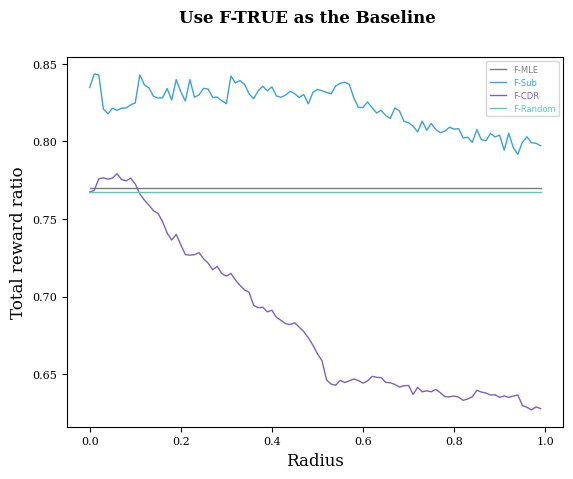

In [49]:
# Extract data for each median
data = results1[:, 0, :].reshape(100, 7)
[y1_median, y2_median, y3_median, y4_median, y5_median, y6_median, y7_median] = [data[:, i] for i in range(7)]
x = [i / 100 for i in range(100)]
# Create a figure and axis
fig, ax = plt.subplots()

# Define colors for each group
colors = ['#C0C0C0', "#7B7B7B", "#38A1E2", "#54CCB6", "#805FC2", '#EE82EE']

# Plot the 'feasible_total_reward_mle/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y2_median, color=colors[1], label="F-MLE", linewidth=1)

# Plot the 'feasible_Rtotal_reward_subgradient/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y4_median, color=colors[2], label="F-Sub", linewidth=1)

# Plot the 'feasible_Rtotal_reward_cdr_c_b/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y6_median, color=colors[4], label="F-CDR", linewidth=1)

# Plot the 'feasible_Rtotal_reward_random/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y7_median, color=colors[3], label="F-Random", linewidth=1)

# Set labels for x and y axes
plt.xlabel("Radius", fontsize=12, fontfamily='serif')
plt.ylabel("Total reward ratio", fontsize=12, fontfamily='serif')

# Customize x-axis and y-axis ticks' font size and font family
plt.xticks(fontsize=8, fontfamily='serif')
plt.yticks(fontsize=8, fontfamily='serif')

# Add a legend
legend = plt.legend(fontsize=6)

# Set the title of the plot
plt.suptitle("Use F-TRUE as the Baseline", fontsize=12, fontweight='bold', fontfamily='serif')

# Change label color in the legend
for text, color in zip(legend.get_texts(), [colors[1], colors[2], colors[4], colors[3]]):
    text.set_color(color)

# Show the plot
plt.show()

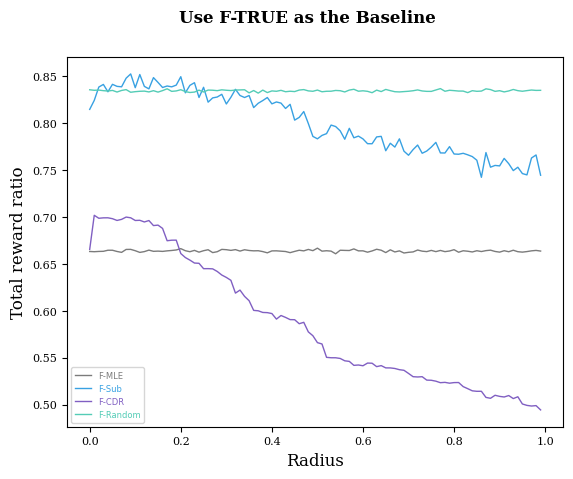

In [26]:
# Extract data for each median
data = results1[:, 0, :].reshape(100, 7)
[y1_median, y2_median, y3_median, y4_median, y5_median, y6_median, y7_median] = [data[:, i] for i in range(7)]
x = [i / 100 for i in range(100)]
# Create a figure and axis
fig, ax = plt.subplots()

# Define colors for each group
colors = ['#C0C0C0', "#7B7B7B", "#38A1E2", "#54CCB6", "#805FC2", '#EE82EE']

# Plot the 'feasible_total_reward_mle/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y2_median, color=colors[1], label="F-MLE", linewidth=1)

# Plot the 'feasible_Rtotal_reward_subgradient/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y4_median, color=colors[2], label="F-Sub", linewidth=1)

# Plot the 'feasible_Rtotal_reward_cdr_c_b/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y6_median, color=colors[4], label="F-CDR", linewidth=1)

# Plot the 'feasible_Rtotal_reward_random/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y7_median, color=colors[3], label="F-Random", linewidth=1)

# Set labels for x and y axes
plt.xlabel("Radius", fontsize=12, fontfamily='serif')
plt.ylabel("Total reward ratio", fontsize=12, fontfamily='serif')

# Customize x-axis and y-axis ticks' font size and font family
plt.xticks(fontsize=8, fontfamily='serif')
plt.yticks(fontsize=8, fontfamily='serif')

# Add a legend
legend = plt.legend(fontsize=6)

# Set the title of the plot
plt.suptitle("Use F-TRUE as the Baseline", fontsize=12, fontweight='bold', fontfamily='serif')

# Change label color in the legend
for text, color in zip(legend.get_texts(), [colors[1], colors[2], colors[4], colors[3]]):
    text.set_color(color)

# Show the plot
plt.show()


In [ ]:
if __name__ == '__main__':
    import cProfile, pstats
    profiler = cProfile.Profile()
    profiler.enable()
    results2  = main(40)
    profiler.disable()
    class Stats(pstats.Stats):
      # list the tuple indices and directions for sorting,
      # along with some printable description
        sort_arg_dict_default = {
          "calls"            : (((1,-1),              ), "call count"),
          "ncalls"           : (((1,-1),              ), "call count"),
          "cumtime"          : (((4,-1),              ), "cumulative time"),
          "cumulative"       : (((4,-1),              ), "cumulative time"),
          "file"             : (((6, 1),              ), "file name"),
          "filename"         : (((6, 1),              ), "file name"),
          "line"             : (((7, 1),              ), "line number"),
          "module"           : (((6, 1),              ), "file name"),
          "name"             : (((8, 1),              ), "function name"),
          "nfl"              : (((8, 1),(6, 1),(7, 1),), "name/file/line"),
          "pcalls"           : (((0,-1),              ), "primitive call count"),
          "stdname"          : (((9, 1),              ), "standard name"),
          "time"             : (((2,-1),              ), "internal time"),
          "tottime"          : (((2,-1),              ), "internal time"),
          "cumulativepercall": (((5,-1),              ), "cumulative time per call"),
          "totalpercall"     : (((3,-1),              ), "total time per call"),
          }


        def sort_stats(self, *field):
          if not field:
            self.fcn_list = 0
            return self
          if len(field) == 1 and isinstance(field[0], int):
            # Be compatible with old profiler
            field = [ {-1: "stdname",
                        0:  "calls",
                        1:  "time",
                        2:  "cumulative"}[field[0]] ]
          elif len(field) >= 2:
            for arg in field[1:]:
              if type(arg) != type(field[0]):
                raise TypeError("Can't have mixed argument type")

          sort_arg_defs = self.get_sort_arg_defs()

          sort_tuple = ()
          self.sort_type = ""
          connector = ""
          for word in field:
            if isinstance(word, pstats.SortKey):
              word = word.value
            sort_tuple = sort_tuple + sort_arg_defs[word][0]
            self.sort_type += connector + sort_arg_defs[word][1]
            connector = ", "
      
          stats_list = []
          for func, (cc, nc, tt, ct, callers) in self.stats.items():
            if nc == 0:
              npc = 0
            else:
              npc = float(tt)/nc

            if cc == 0:
              cpc = 0
            else:
              cpc = float(ct)/cc

            stats_list.append((cc, nc, tt, npc, ct, cpc) + func +
                              (pstats.func_std_string(func), func))

          stats_list.sort(key=pstats.cmp_to_key(pstats.TupleComp(sort_tuple).compare))

          self.fcn_list = fcn_list = []
          for tuple in stats_list:
            fcn_list.append(tuple[-1])
          return self

    stats = Stats(profiler).sort_stats('totalpercall')
    stats.print_stats()
results3 = np.array(results2)    

In [ ]:
# Extract data for each median
data = results3[:, 0, :].reshape(20, 6)
[y1_median, y2_median, y3_median, y4_median, y5_median, y6_median] = [data[:, i] for i in range(6)]
x = [i / 20 for i in range(20)]

# Create a figure and axis
fig, ax = plt.subplots()

# Define colors for each group
colors = ['#C0C0C0', '#A9A9A9', '#87CEFA', '#00BFFF', '#9370DB', '#EE82EE']

# Plot the 'feasible_total_reward_mle/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y2_median, color=colors[1], label="FP_FLP_MLE", linewidth=1)

# Plot the 'feasible_Rtotal_reward_mle_noc_b/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y4_median, color=colors[3], label="FP_Lag_MLE", linewidth=1)

# Plot the 'feasible_Rtotal_reward_mle_c_b/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y6_median, color=colors[5], label="FP_CDRLP_MLE_cb", linewidth=1)

# Set labels for x and y axes
plt.xlabel("Radius", fontsize=12, fontfamily='serif')
plt.ylabel("Total reward ratio", fontsize=12, fontfamily='serif')

# Customize x-axis and y-axis ticks' font size and font family
plt.xticks(fontsize=8, fontfamily='serif')
plt.yticks(fontsize=8, fontfamily='serif')

# Add a legend
legend = plt.legend(fontsize=6)

# Set the title of the plot
plt.suptitle("Use IF_FLP_TRUE as the Baseline", fontsize=12, fontweight='bold', fontfamily='serif')

# Change label color in the legend
for text, color in zip(legend.get_texts(), [colors[1], colors[3], colors[5]]):
    text.set_color(color)

# Show the plot
plt.show()

#### **Part 7: Choose the optimal radius**

In [ ]:
import tracemalloc
def main(sample_idx: int):
    selecting_rule = 0.6
    number_of_timeperiods = 15
    number_of_states = 6
    number_of_bandit_in_total = 100
    path_length = 15
    num_paths = 5
    pulled_ratio = 0.25
    iteration = 500
    results = []
    for i in tqdm(range(20)):
        r = i / 20
        (init_prob, prob_pull, prob_donothing, reward_donothing, reward_pull, radius_pull_all, radius_donothing_all, radius_pull_part, radius_donothing_part), (initial_prob_all, transition_kernel_pull_all, transition_kernel_donothing_all, transition_kernel_pull_part, transition_kernel_donothing_part, N_sa_all, N_sas_all) = get_single_sample_val(
                        sample_idx,
                        number_of_timeperiods,
                        number_of_states,
                        number_of_bandit_in_total,
                        path_length,
                        num_paths,
                        pulled_ratio,
                        r,
                        path_length - 5,
                        selecting_rule,
                        )
        results.append(policy_ratio_Lag(
                        number_of_timeperiods,
                        number_of_bandit_in_total,
                        number_of_states,
                        init_prob,
                        transition_kernel_pull_part,
                        transition_kernel_donothing_part,
                        reward_donothing,
                        reward_pull,
                        init_prob,
                        transition_kernel_pull_all,
                        transition_kernel_donothing_all,
                        pulled_ratio,
                        radius_pull_all,
                        radius_donothing_all,
                        iteration,
                    ))
    return results
class TimeCounter:
    # we implement a simple context timer for measuring the running time of the code
    def __init__(self, name: str = ""):
        self.start_time = time.time()
        self.name = name or "timer"

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        end_time = time.time()
        print(
            f"running {self.name} time elapsed: {end_time - self.start_time:.2f} seconds"
        )
            
if __name__ == "__main__":
    # with TimeCounter("original"):
    #     main()
    # start tracing python memory allocations
    tracemalloc.start()
    
    #run the main function
    with TimeCounter("policy_all_running"):
        results_val  = main(20)
    # get the current and peak memory usage
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current memory usage is {current / 1024:.1f}KiB; Peak was {peak / 1024:.1f}KiB")
    
    # stop the tracmalloc module
    tracemalloc.stop()
results_val1 = np.array(results_val)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Extract data for each median
data = results_val1[:, 0, :].reshape(20, 6)
[y1_median, y2_median, y3_median, y4_median, y5_median, y6_median] = [data[:, i] for i in range(6)]
x = [i / 20 for i in range(20)]

# Create a figure and axis
fig, ax = plt.subplots()

# Define colors for each group
colors = ['#C0C0C0', '#A9A9A9', '#87CEFA', '#00BFFF', '#9370DB', '#EE82EE']

# Plot the 'feasible_total_reward_mle/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y2_median, color=colors[1], label="FP_FLP_MLE", linewidth=1)

# Plot the 'feasible_Rtotal_reward_mle_noc_b/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y4_median, color=colors[3], label="FP_Lag_MLE", linewidth=1)

# Plot the 'feasible_Rtotal_reward_mle_c_b/infeasible_total_reward_true' curves and fill between them
ax.plot(x, y6_median, color=colors[5], label="FP_CDRLP_MLE_cb", linewidth=1)

# Set labels for x and y axes
plt.xlabel("Radius", fontsize=12, fontfamily='serif')
plt.ylabel("Total reward ratio", fontsize=12, fontfamily='serif')

# Customize x-axis and y-axis ticks' font size and font family
plt.xticks(fontsize=8, fontfamily='serif')
plt.yticks(fontsize=8, fontfamily='serif')

# Add a legend
legend = plt.legend(fontsize=6)

# Set the title of the plot
plt.suptitle("Use IF_FLP_TRUE as the Baseline", fontsize=12, fontweight='bold', fontfamily='serif')

# Change label color in the legend
for text, color in zip(legend.get_texts(), [colors[1], colors[3], colors[5]]):
    text.set_color(color)

# Show the plot
plt.show()